
# Global Stock Market Forecasting


In [1]:
# Importing Libraries

# Data handling and statistical analysis
import pandas as pd
import numpy as np
from scipy import stats
from pandas_datareader import data as pdr

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Max-min scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

#Machine Learning
!pip install tensorflow
!pip install pystan prophet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from prophet import Prophet
import statsmodels.api as sm

!pip install pmdarima
from pmdarima import auto_arima
import shap
import xgboost as xgb




# Optimization and allocation
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
!pip install --upgrade yfinance
!pip install quantstats
!pip install ta
!pip install pmdarima
import quantstats as qs
import ta
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# For time stamps
from datetime import datetime
from datetime import timedelta

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings
!pip install --upgrade optuna
import datetime as dt
from datetime import datetime, timedelta
import warnings
import pytz
import os
import optuna
# Other
from tabulate import tabulate

warnings.filterwarnings("ignore")

  Using cached quantstats-0.0.81-py3-none-any.whl.metadata (10 kB)
Using cached quantstats-0.0.81-py3-none-any.whl (90 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=db33348050e0ed6eb4a9b19453ca24d1a9805825f1bcf425afebb0da9d10d6a6
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 10.9 MB/s eta 0:00:00


In [2]:
df=pd.DataFrame()

In [3]:
# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']


# Get yesterday's date
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

# Download data
df = yf.download(tickers, start="2020-01-01", end=yesterday,group_by=tickers, auto_adjust=False)

# ✅ Reset index to move 'Date' from index to a column
df = df.stack(level=0).reset_index()

# ✅ Rename columns for clarity
df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Display the cleaned DataFrame
df.tail(10)


[*********************100%***********************]  15 of 15 completed


Date Ticker        Open        High         Low       Close  \
22835 2026-01-23     KO   72.019997   73.059998   71.779999   72.879997   
22836 2026-01-23    MCD  306.100006  309.510010  305.359985  309.250000   
22837 2026-01-23   META  644.770020  666.489990  644.450012  658.760010   
22838 2026-01-23   MSFT  451.869995  471.100006  450.529999  465.950012   
22839 2026-01-23   NVDA  187.500000  189.600006  186.820007  187.669998   
22840 2026-01-23   TSLA  447.429993  452.429993  444.040009  449.059998   
22841 2026-01-23    TSM  332.070007  337.149994  331.369995  334.869995   
22842 2026-01-23      V  325.859985  327.799988  324.619995  326.179993   
22843 2026-01-23    WMT  118.169998  118.610001  117.139999  117.730003   
22844 2026-01-23    XOM  135.089996  135.979996  134.479996  134.970001   

        Adj Close     Volume  
22835   72.879997   18303600  
22836  309.250000    2350200  
22837  658.760010   22773600  
22838  465.950012   37962400  
22839  187.669998  142524700  
22840  449.059998   56636400  
22841  334.869995   12872900  
22842  326.179993    5665900  
22843  117.730003   20794100  
22844  134.970001   17741700

In [4]:
df['target_up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [5]:
df.head(5)

Date Ticker        Open        High         Low       Close  \
0 2020-01-02   AAPL   74.059998   75.150002   73.797501   75.087502   
1 2020-01-02   AMZN   93.750000   94.900497   93.207497   94.900497   
2 2020-01-02  GOOGL   67.420502   68.433998   67.324501   68.433998   
3 2020-01-02    JNJ  145.869995  146.020004  145.080002  145.970001   
4 2020-01-02    JPM  139.789993  141.100006  139.259995  141.089996   

    Adj Close     Volume  target_up  
0   72.468254  135480400          1  
1   94.900497   80580000          0  
2   67.920807   27278000          1  
3  123.290184    5777000          0  
4  119.036430   10803700          0

In [6]:
df=df.set_index('Date')

In [7]:
df[df['Ticker']=='AAPL'].describe()

Open         High          Low        Close    Adj Close  \
count  1523.000000  1523.000000  1523.000000  1523.000000  1523.000000   
mean    167.804386   169.675665   166.075862   167.954110   165.854957   
std      49.537544    49.852366    49.229183    49.553192    50.318773   
min      57.020000    57.125000    53.152500    56.092499    54.264332   
25%     134.965004   136.440002   133.534996   134.854996   131.680168   
50%     166.910004   168.880005   165.500000   166.649994   164.169373   
75%     200.004997   202.470001   197.875000   200.360001   199.939049   
max     286.200012   288.619995   283.299988   286.190002   286.190002   

             Volume    target_up  
count  1.523000e+03  1523.000000  
mean   8.418625e+07     0.398555  
std    5.124522e+07     0.489762  
min    1.791060e+07     0.000000  
25%    5.044910e+07     0.000000  
50%    6.990710e+07     0.000000  
75%    9.998435e+07     1.000000  
max    4.265100e+08     1.000000

In [8]:
df[df['Ticker']=='AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1523 entries, 2020-01-02 to 2026-01-23
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1523 non-null   object 
 1   Open       1523 non-null   float64
 2   High       1523 non-null   float64
 3   Low        1523 non-null   float64
 4   Close      1523 non-null   float64
 5   Adj Close  1523 non-null   float64
 6   Volume     1523 non-null   int64  
 7   target_up  1523 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 107.1+ KB


In [9]:
df.nunique()

Ticker          15
Open         17223
High         17520
Low          17632
Close        17797
Adj Close    22361
Volume       22374
target_up        2
dtype: int64

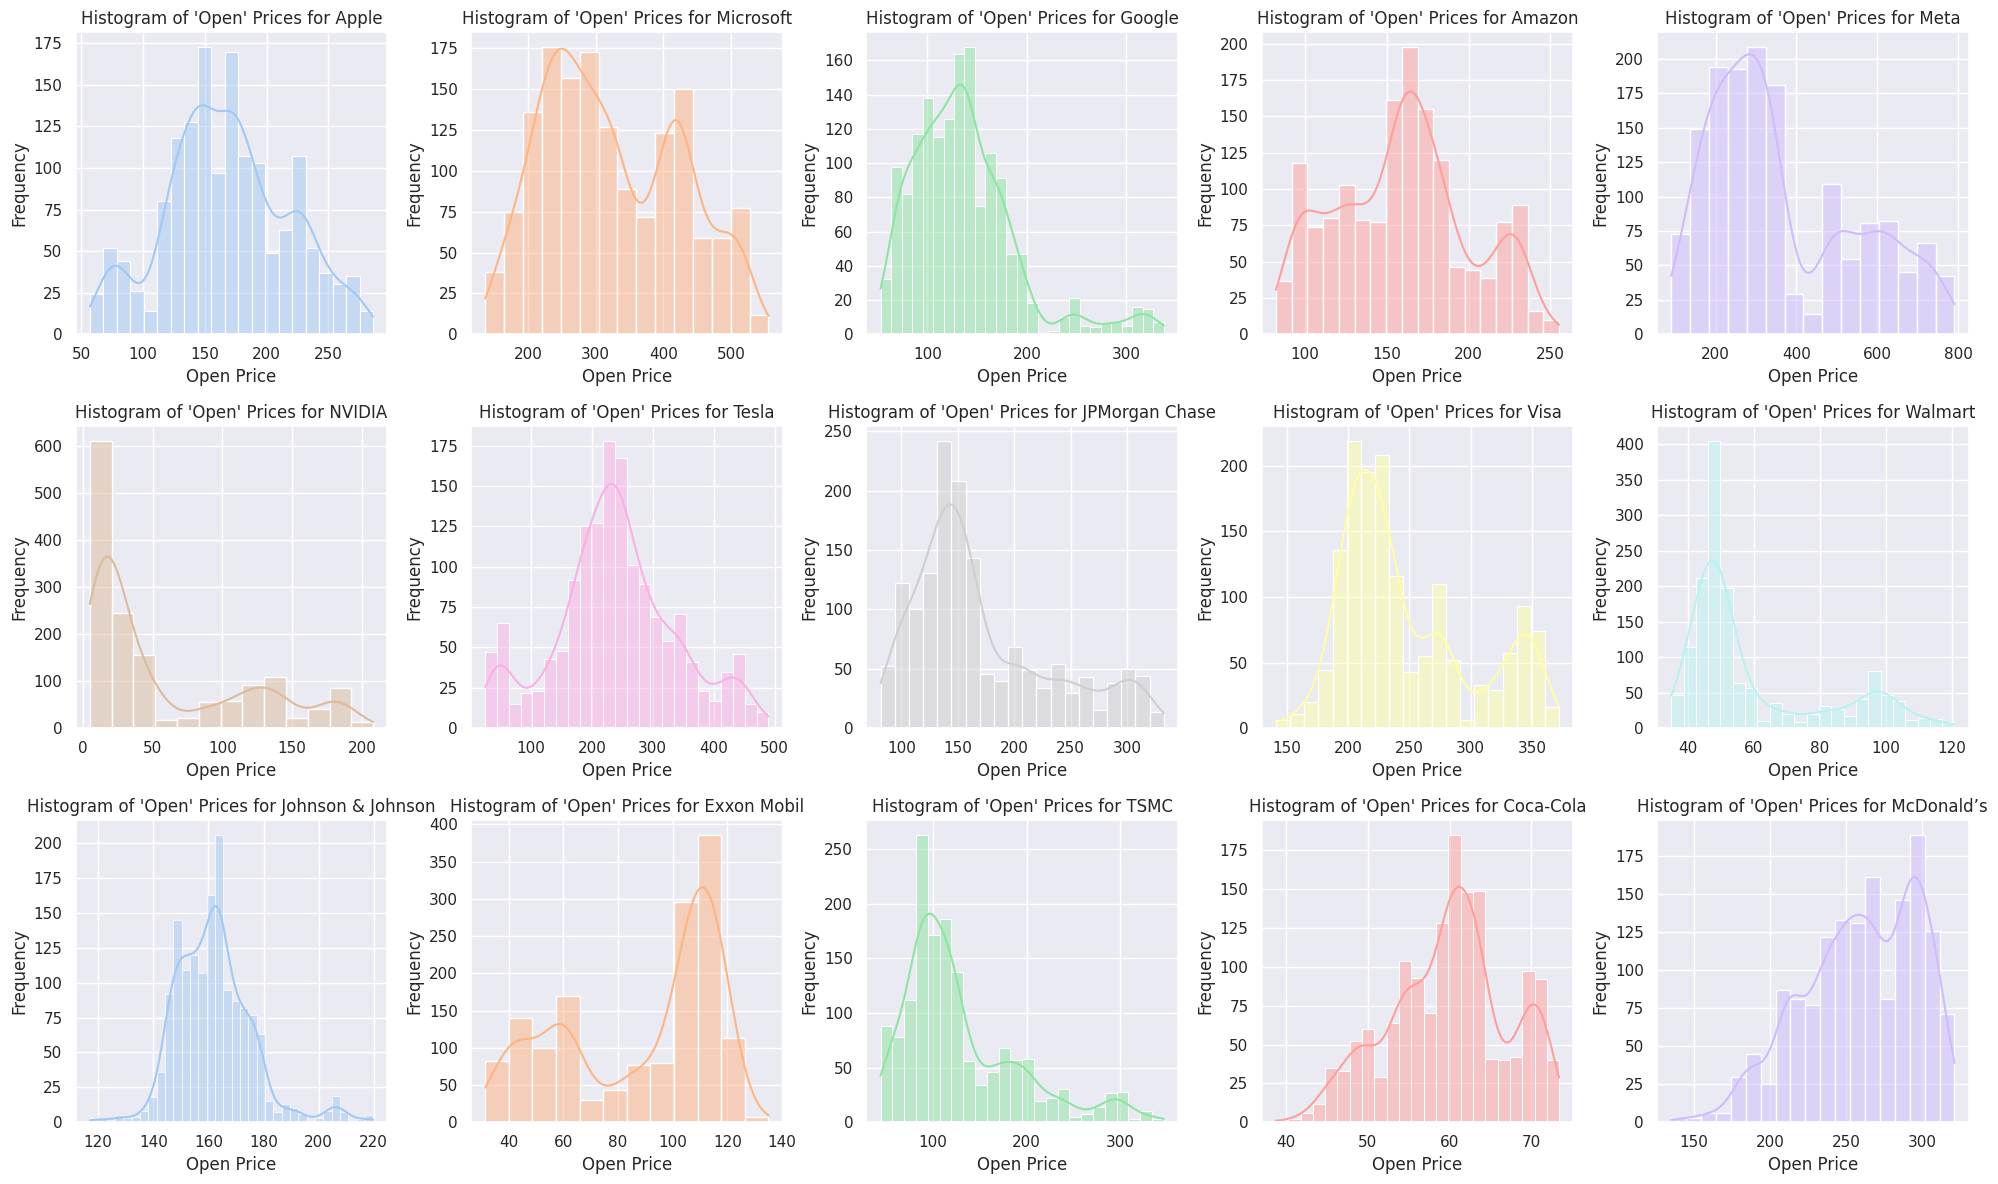

In [10]:
# Set the figure size
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="pastel")  # Soft color palette (pastel)

# List of tickers you want to plot
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']
companies = names = ['Apple','Microsoft','Google','Amazon','Meta','NVIDIA','Tesla','JPMorgan Chase','Visa','Walmart','Johnson & Johnson','Exxon Mobil','TSMC','Coca-Cola','McDonald’s']

# Create a 3x5 grid of subplots to accommodate all 15 tickers
plt.figure(figsize=(20, 12)) # Adjusted figure size for better visualization

# Loop through each ticker and plot the distribution of 'Open' prices
for i, (ticker,company) in enumerate(zip(tickers,companies),1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker within a 3x5 grid
    plt.subplot(3, 5, i) # Changed from 2, 2 to 3, 5

    # Plot histogram with KDE
    sns.histplot(data=ticker_data, x='Open', kde=True, color=sns.color_palette(n_colors=len(tickers))[i-1])

    # Add title and labels
    plt.title(f"Histogram of 'Open' Prices for {company}")
    plt.xlabel("Open Price")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
import quantstats as qs
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Define df (copied from earlier cells to make this cell self-contained for the fix)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df = yf.download(tickers, start="2020-01-01", end=yesterday,group_by=tickers, auto_adjust=False)
df = df.stack(level=0).reset_index()
df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df['target_up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Measuring skewness with quantstats
print('Measuring skewness of each company:')

print("Apple's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AAPL']['Open']).round(3))
print("Microsoft's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MSFT']['Open']).round(3))
print("Google's skewness: ", qs.stats.skew(df[df['Ticker'] == 'GOOGL']['Open']).round(3))
print("Amazon's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AMZN']['Open']).round(3))
print("Meta's skewness: ", qs.stats.skew(df[df['Ticker'] == 'META']['Open']).round(3))
print("NVIDIA's skewness: ", qs.stats.skew(df[df['Ticker'] == 'NVDA']['Open']).round(3))
print("Tesla's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSLA']['Open']).round(3))
print("JPMorgan Chase's skewness: ", qs.stats.skew(df[df['Ticker'] == 'JPM']['Open']).round(3))
print("Visa's skewness: ", qs.stats.skew(df[df['Ticker'] == 'V']['Open']).round(3))
print("Walmart's skewness: ", qs.stats.skew(df[df['Ticker'] == 'WMT']['Open']).round(3))
print("Johnson & Johnson's skewness: ", qs.stats.skew(df[df['Ticker'] == 'JNJ']['Open']).round(3))
print("Exxon Mobil's skewness: ", qs.stats.skew(df[df['Ticker'] == 'XOM']['Open']).round(3))
print("TSMC's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSM']['Open']).round(3))
print("Coca-Cola's skewness: ", qs.stats.skew(df[df['Ticker'] == 'KO']['Open']).round(3))
print("McDonald's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MCD']['Open']).round(3))

[*********************100%***********************]  15 of 15 completed


Measuring skewness of each company:
Apple's skewness:  0.066
Microsoft's skewness:  0.076
Google's skewness:  0.43
Amazon's skewness:  0.143
Meta's skewness:  -0.324
NVIDIA's skewness:  0.323
Tesla's skewness:  0.407
JPMorgan Chase's skewness:  -0.023
Visa's skewness:  -0.145
Walmart's skewness:  0.264
Johnson & Johnson's skewness:  -0.357
Exxon Mobil's skewness:  -0.304
TSMC's skewness:  0.236
Coca-Cola's skewness:  -0.921
McDonald's skewness:  0.041


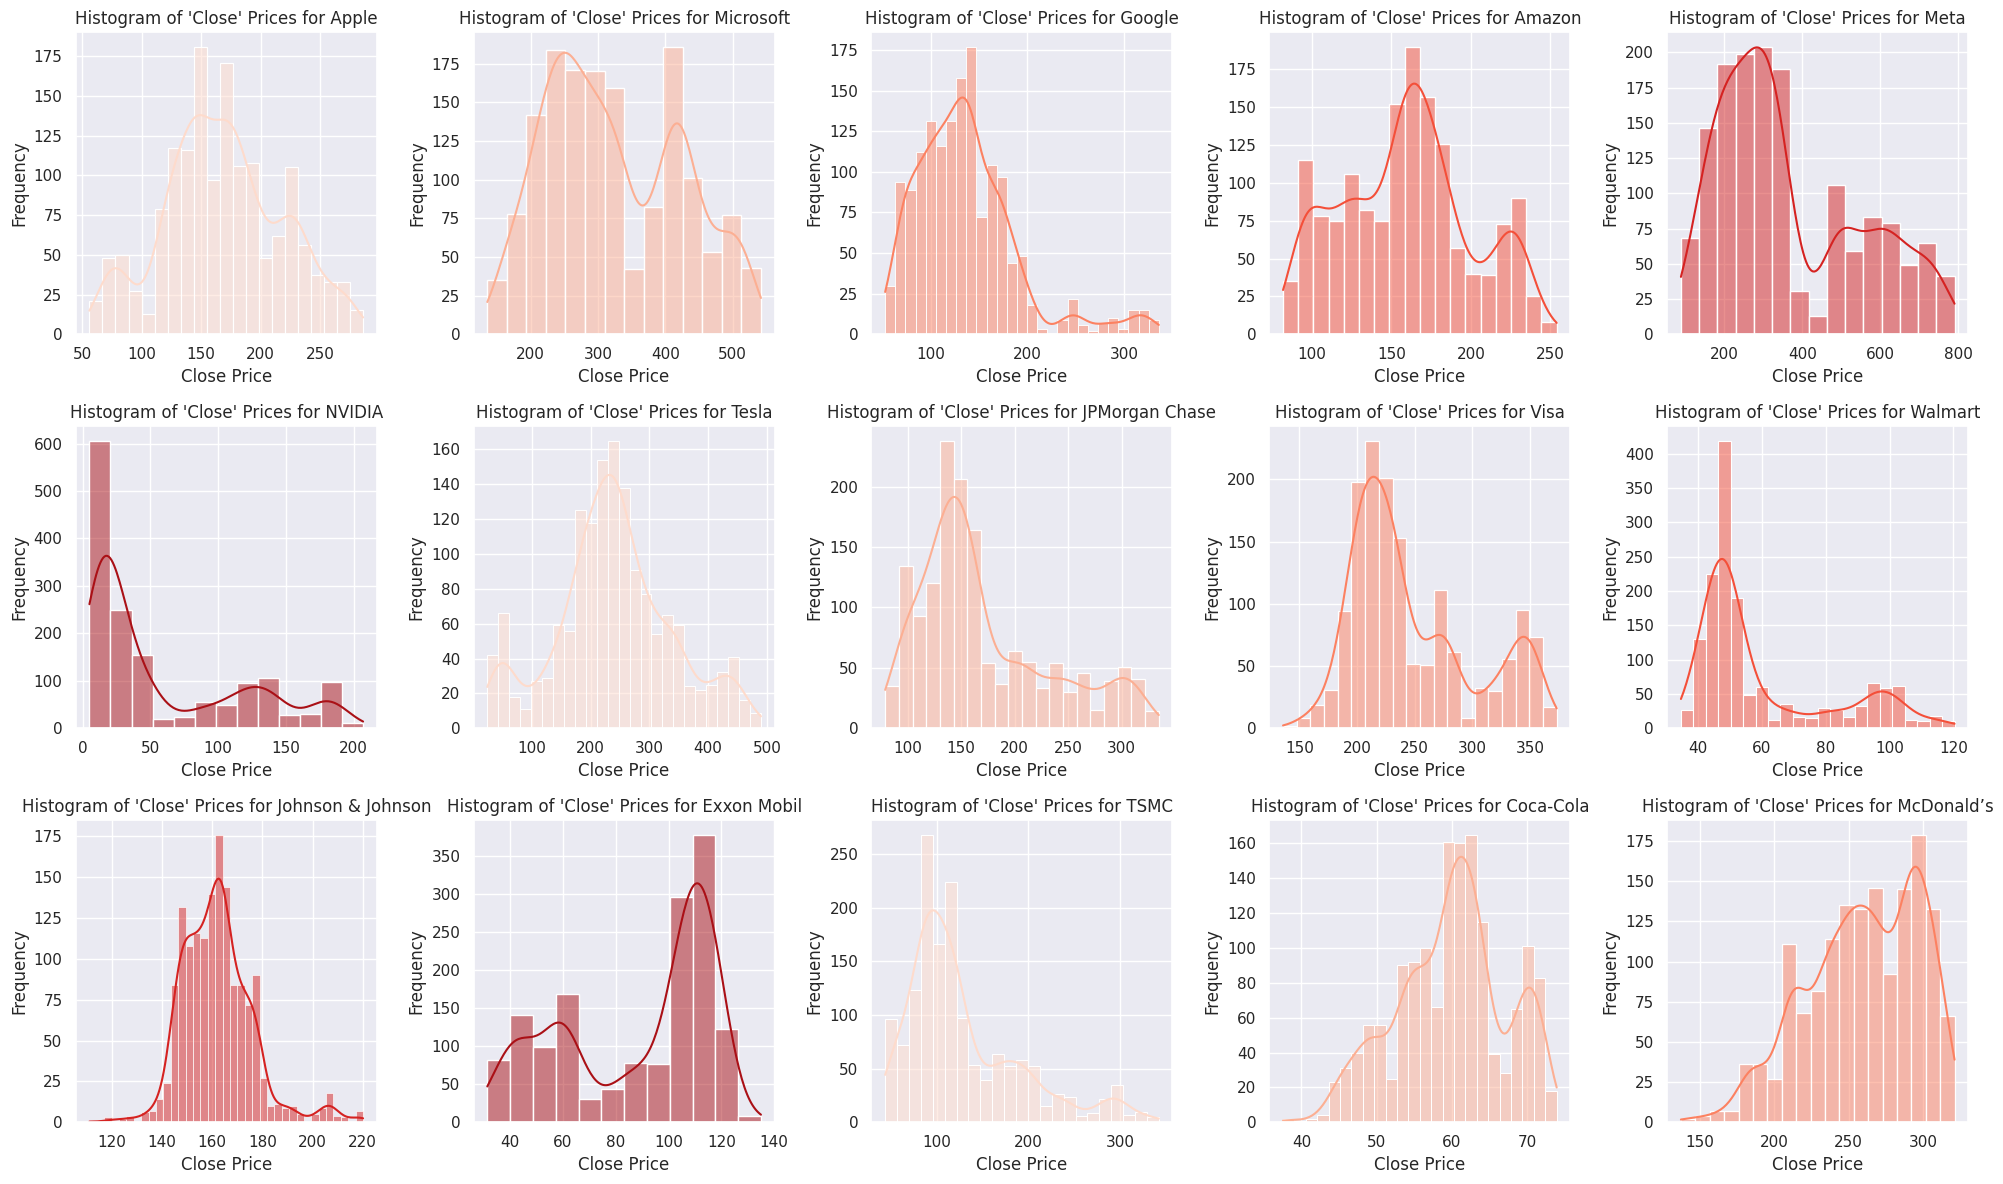

In [12]:
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="Reds")
# List of tickers you want to plot
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']
companies = names = ['Apple','Microsoft','Google','Amazon','Meta','NVIDIA','Tesla','JPMorgan Chase','Visa','Walmart','Johnson & Johnson','Exxon Mobil','TSMC','Coca-Cola','McDonald’s']

# Create a 3x5 grid of subplots
plt.figure(figsize=(20, 12)) # Adjusted figure size for better visualization

# Loop through each ticker and plot the distribution of 'Open' prices
for i, (ticker,company) in enumerate(zip(tickers,companies), 1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker
    plt.subplot(3, 5, i) # Changed from 2, 2 to 3, 5

    # Plot histogram with KDE
    sns.histplot(data=ticker_data, x='Close', kde=True, color=sns.color_palette(n_colors=len(tickers))[i-1])

    # Add title and labels
    plt.title(f"Histogram of 'Close' Prices for {company}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
import yfinance as yf
from datetime import datetime, timedelta

# Re-download data for all tickers to ensure 'df' has the 'Ticker' column
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df = yf.download(tickers, start="2020-01-01", end=yesterday,group_by=tickers, auto_adjust=False)
df = df.stack(level=0).reset_index()
df.columns = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Set 'Date' as index for consistency with other analysis cells, but 'Ticker' remains a column.
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Measuring skewness with quantstats
print('Measuring skewness of each company:')

print("Apple's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AAPL']['Close']).round(3))
print("Microsoft's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MSFT']['Close']).round(3))
print("Google's skewness: ", qs.stats.skew(df[df['Ticker'] == 'GOOGL']['Close']).round(3))
print("Amazon's skewness: ", qs.stats.skew(df[df['Ticker'] == 'AMZN']['Close']).round(3))
print("Meta's skewness: ", qs.stats.skew(df[df['Ticker'] == 'META']['Close']).round(3))
print("NVIDIA's skewness: ", qs.stats.skew(df[df['Ticker'] == 'NVDA']['Close']).round(3))
print("Tesla's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSLA']['Close']).round(3))
print("JPMorgan Chase's skewness: ", qs.stats.skew(df[df['Ticker'] == 'JPM']['Close']).round(3))
print("Visa's skewness: ", qs.stats.skew(df[df['Ticker'] == 'V']['Close']).round(3))
print("Walmart's skewness: ", qs.stats.skew(df[df['Ticker'] == 'WMT']['Close']).round(3))
print("Johnson & Johnson's skewness: ", qs.stats.skew(df[df['Ticker'] == 'JNJ']['Close']).round(3))
print("Exxon Mobil's skewness: ", qs.stats.skew(df[df['Ticker'] == 'XOM']['Close']).round(3))
print("TSMC's skewness: ", qs.stats.skew(df[df['Ticker'] == 'TSM']['Close']).round(3))
print("Coca-Cola's skewness: ", qs.stats.skew(df[df['Ticker'] == 'KO']['Close']).round(3))
print("McDonald's skewness: ", qs.stats.skew(df[df['Ticker'] == 'MCD']['Close']).round(3))

[*********************100%***********************]  15 of 15 completed


Measuring skewness of each company:
Apple's skewness:  0.292
Microsoft's skewness:  0.113
Google's skewness:  0.001
Amazon's skewness:  0.14
Meta's skewness:  -0.183
NVIDIA's skewness:  0.352
Tesla's skewness:  0.243
JPMorgan Chase's skewness:  0.349
Visa's skewness:  0.234
Walmart's skewness:  0.206
Johnson & Johnson's skewness:  0.267
Exxon Mobil's skewness:  0.003
TSMC's skewness:  0.234
Coca-Cola's skewness:  -0.551
McDonald's skewness:  0.412


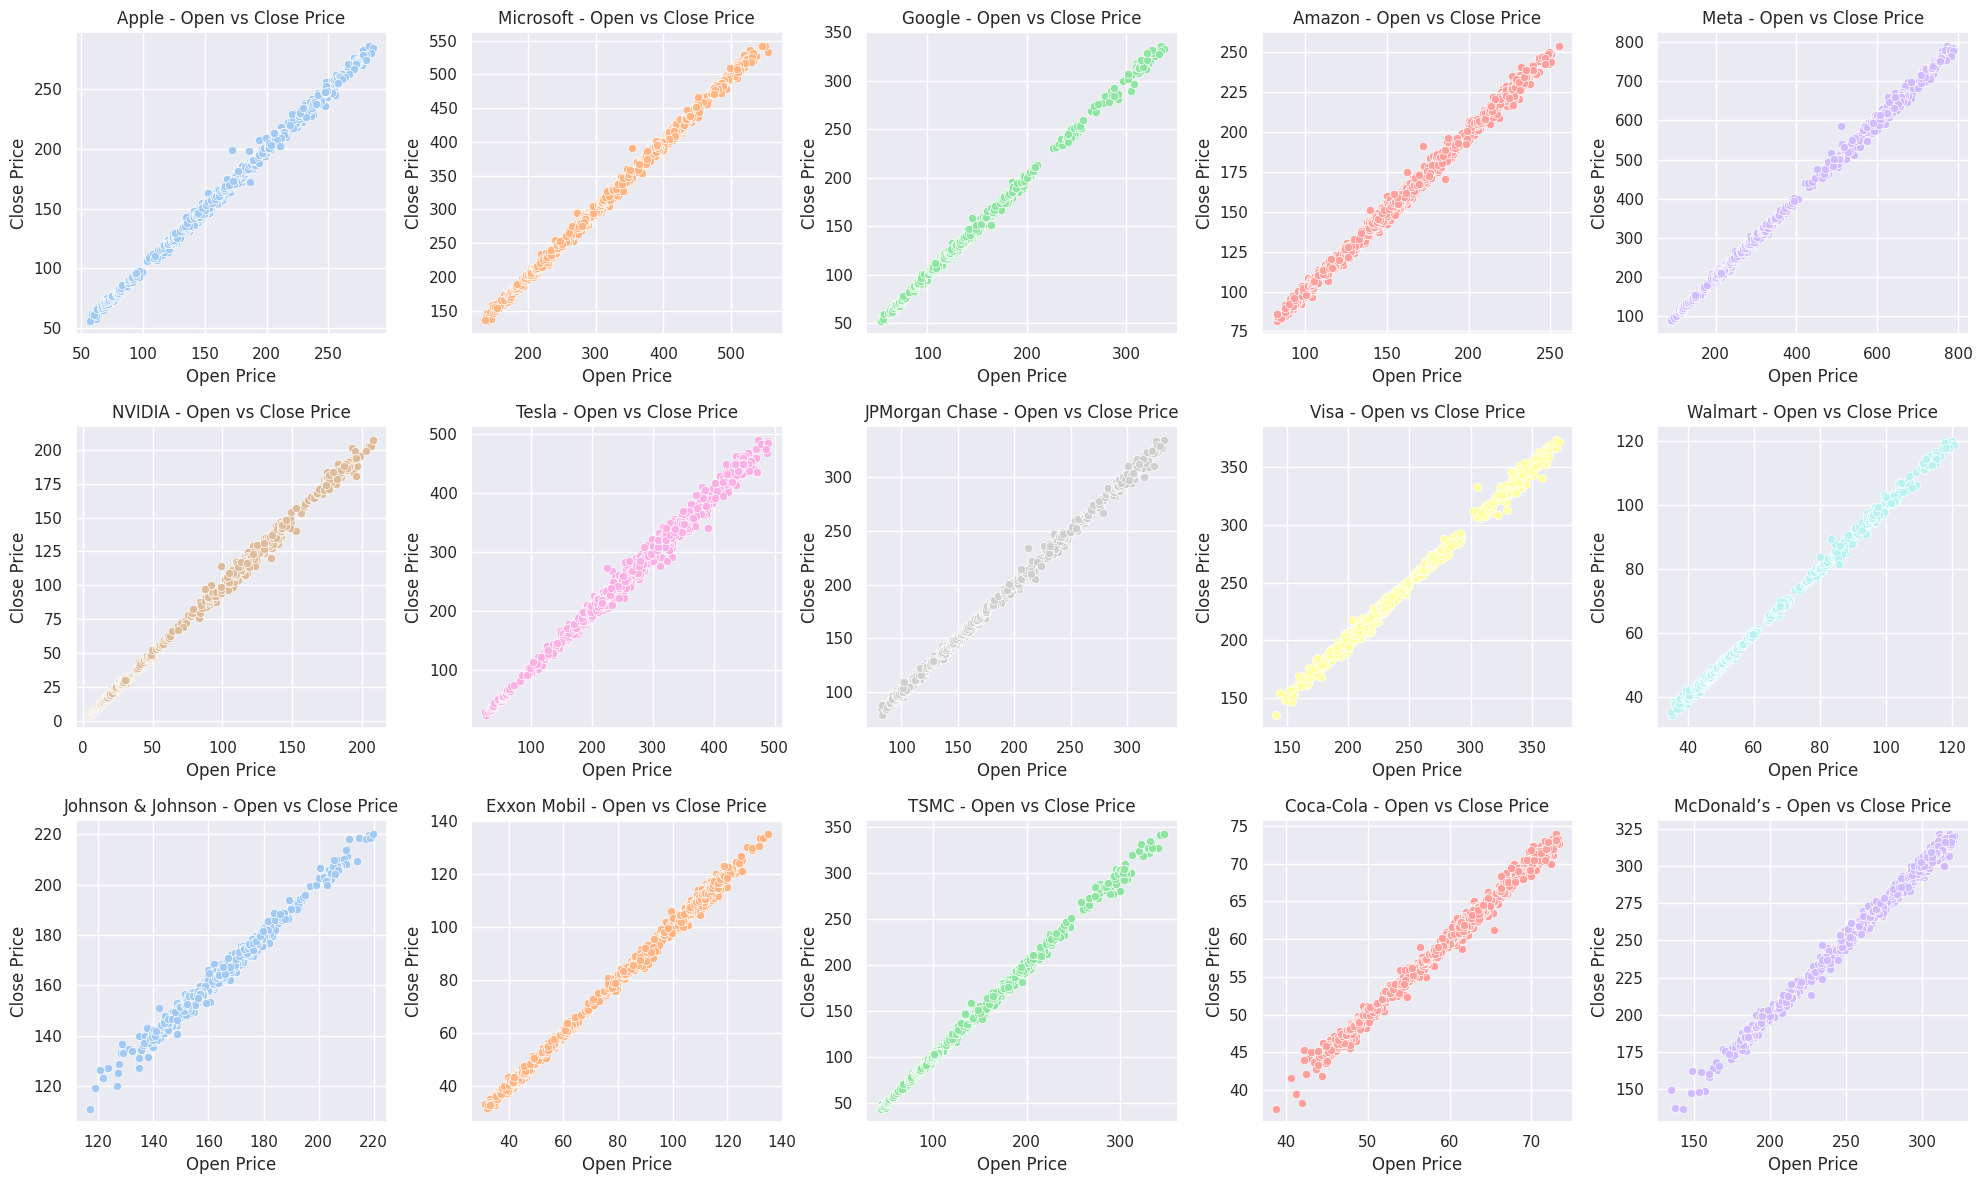

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and use a pastel color palette
sns.set(rc={'figure.figsize':(11.7, 8.27)}, palette="pastel")

# List of tickers and corresponding company names
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','NVDA', 'TSLA', 'JPM', 'V', 'WMT','JNJ', 'XOM', 'TSM', 'KO', 'MCD']
companies = names = ['Apple','Microsoft','Google','Amazon','Meta','NVIDIA','Tesla','JPMorgan Chase','Visa','Walmart','Johnson & Johnson','Exxon Mobil','TSMC','Coca-Cola','McDonald’s']

# Create a grid of subplots
plt.figure(figsize=(20, 12))

# Loop through each ticker and corresponding company name
for i, (ticker, company) in enumerate(zip(tickers, companies), 1):
    # Filter data for the current ticker
    ticker_data = df[df['Ticker'] == ticker]

    # Create a subplot for each ticker
    plt.subplot(3, 5, i)

    # Plot scatterplot for Open vs Close prices
    sns.scatterplot(x='Open', y='Close', data=ticker_data, color=sns.color_palette(n_colors=len(tickers))[i-1])

    # Add title and labels
    plt.title(f"{company} - Open vs Close Price")
    plt.xlabel("Open Price")
    plt.ylabel("Close Price")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

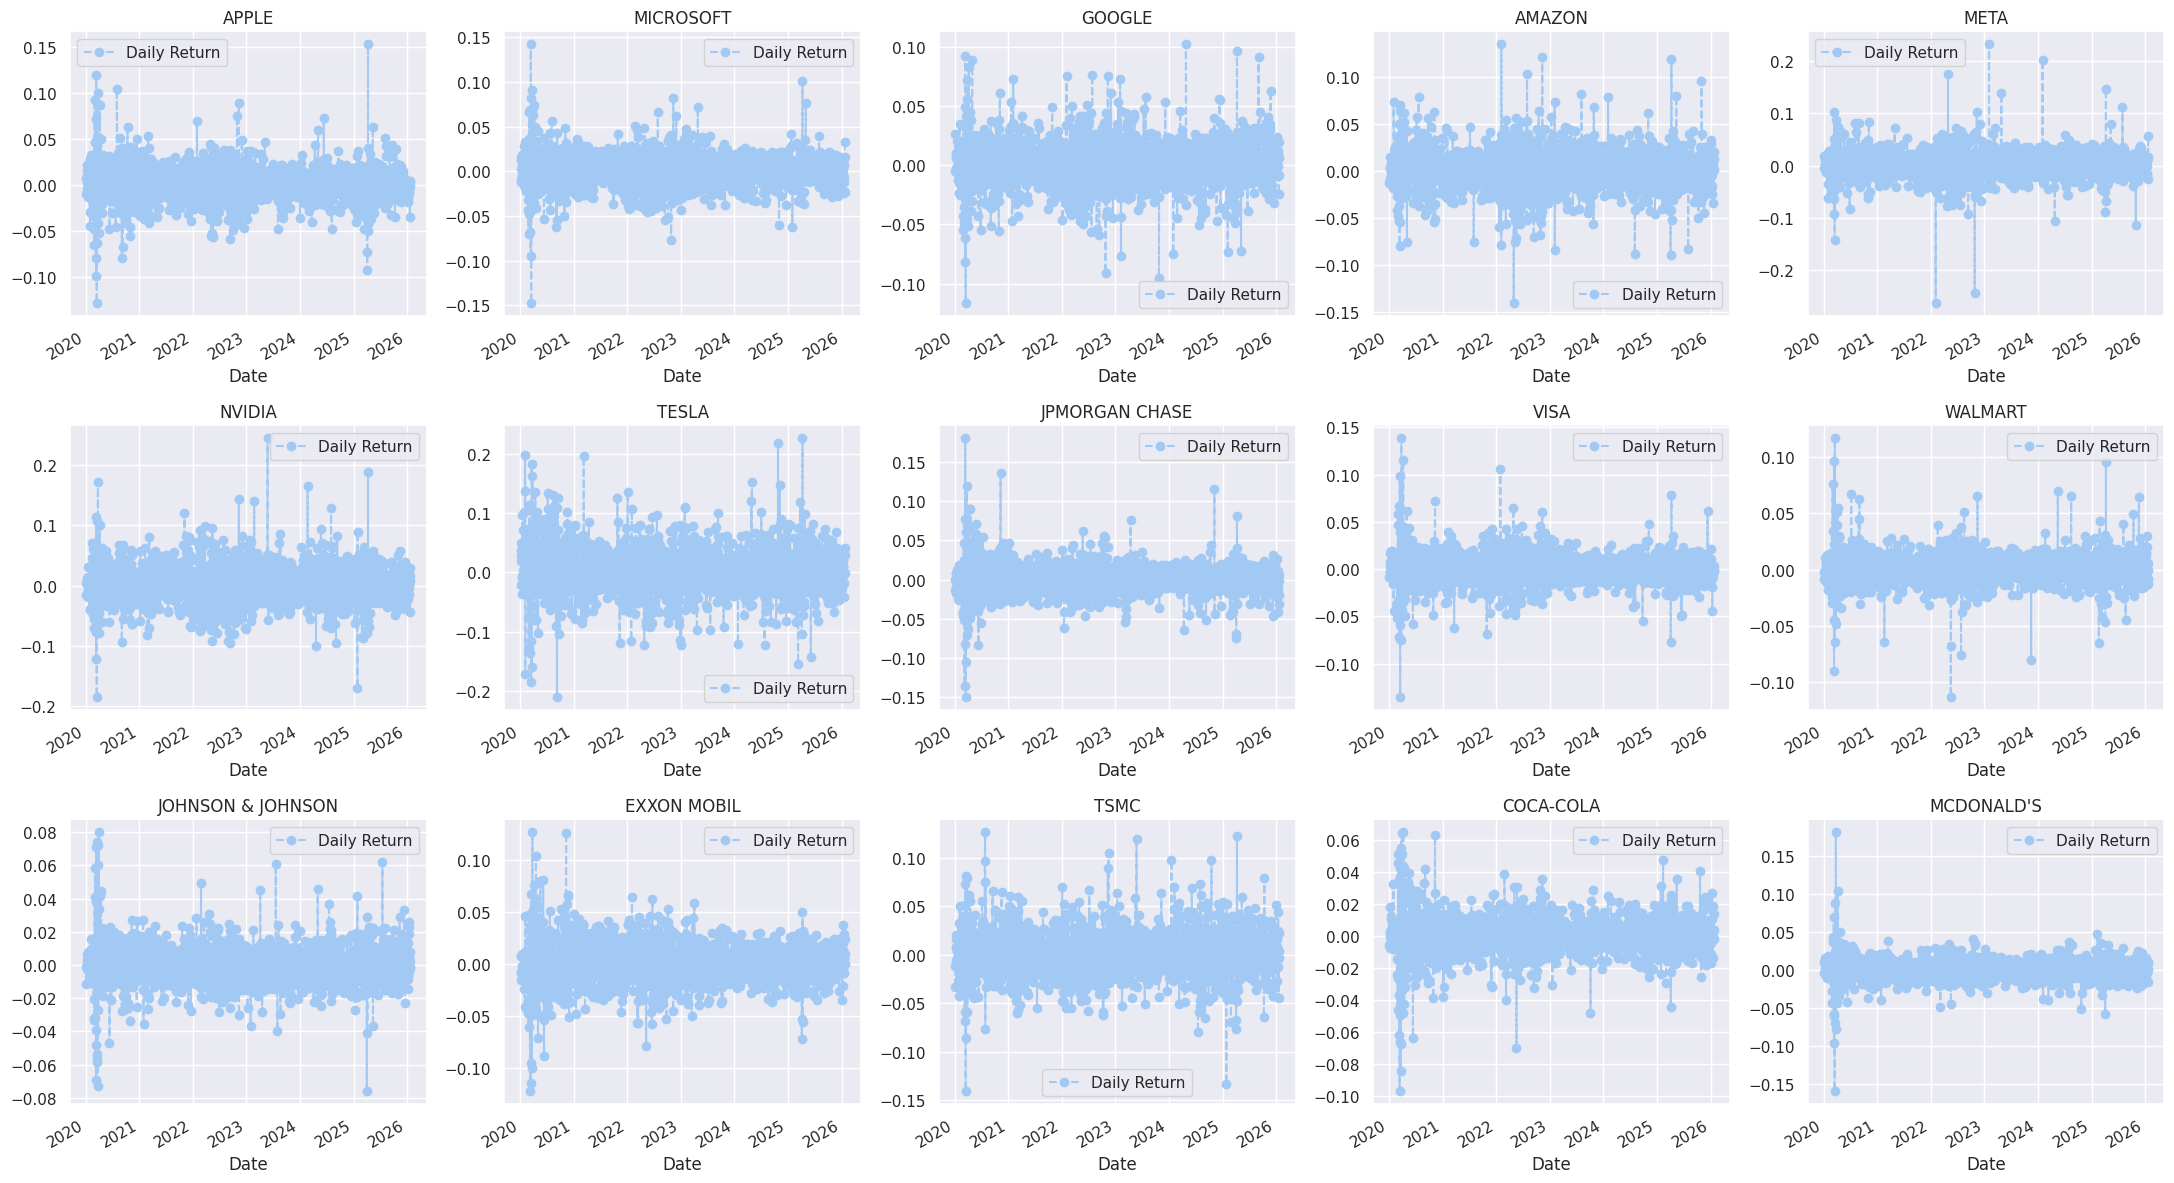

In [15]:
df['Daily Return'] =df.groupby('Ticker')['Adj Close'].pct_change()
# Then we'll plot the daily return percentage


# Filter data-
aapl_returns = df[df['Ticker'] == 'AAPL']['Daily Return'].dropna()
msft_returns = df[df['Ticker'] == 'MSFT']['Daily Return'].dropna()
googl_returns = df[df['Ticker'] == 'GOOGL']['Daily Return'].dropna()
amzn_returns = df[df['Ticker'] == 'AMZN']['Daily Return'].dropna()
meta_returns = df[df['Ticker'] == 'META']['Daily Return'].dropna()
nvda_returns = df[df['Ticker'] == 'NVDA']['Daily Return'].dropna()
tsla_returns = df[df['Ticker'] == 'TSLA']['Daily Return'].dropna()
jpm_returns = df[df['Ticker'] == 'JPM']['Daily Return'].dropna()
v_returns = df[df['Ticker'] == 'V']['Daily Return'].dropna()
wmt_returns = df[df['Ticker'] == 'WMT']['Daily Return'].dropna()
jnj_returns = df[df['Ticker'] == 'JNJ']['Daily Return'].dropna()
xom_returns = df[df['Ticker'] == 'XOM']['Daily Return'].dropna()
tsm_returns = df[df['Ticker'] == 'TSM']['Daily Return'].dropna()
ko_returns = df[df['Ticker'] == 'KO']['Daily Return'].dropna()
mcd_returns = df[df['Ticker'] == 'MCD']['Daily Return'].dropna()


fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_figheight(12)
fig.set_figwidth(22)

aapl_returns.plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

msft_returns.plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('MICROSOFT')

googl_returns.plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('GOOGLE')

amzn_returns.plot(ax=axes[0,3], legend=True, linestyle='--', marker='o')
axes[0,3].set_title('AMAZON')

meta_returns.plot(ax=axes[0,4], legend=True, linestyle='--', marker='o')
axes[0,4].set_title('META')

nvda_returns.plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')

tsla_returns.plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

jpm_returns.plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('JPMORGAN CHASE')

v_returns.plot(ax=axes[1,3], legend=True, linestyle='--', marker='o')
axes[1,3].set_title('VISA')

wmt_returns.plot(ax=axes[1,4], legend=True, linestyle='--', marker='o')
axes[1,4].set_title('WALMART')

jnj_returns.plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('JOHNSON & JOHNSON')

xom_returns.plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('EXXON MOBIL')

tsm_returns.plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title('TSMC')

ko_returns.plot(ax=axes[2,3], legend=True, linestyle='--', marker='o')
axes[2,3].set_title('COCA-COLA')

mcd_returns.plot(ax=axes[2,4], legend=True, linestyle='--', marker='o')
axes[2,4].set_title("MCDONALD'S")

fig.tight_layout()



Apple Daily Returns Histogram


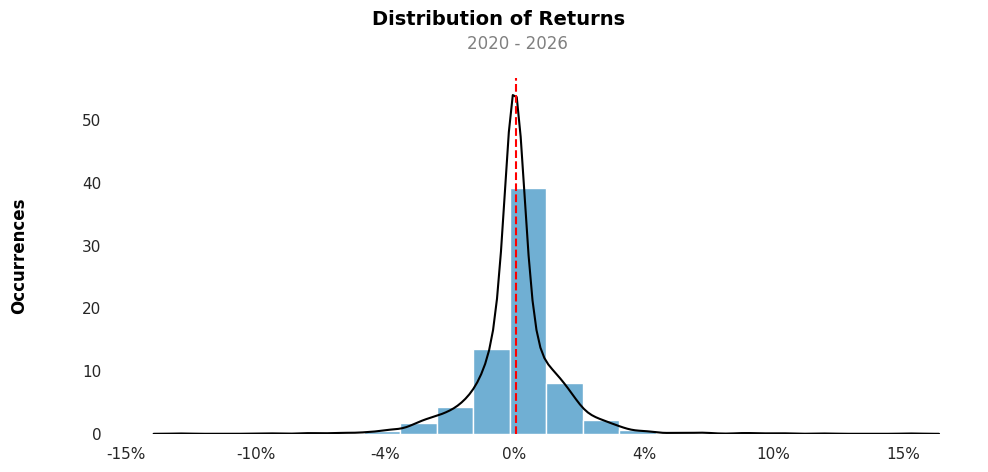


Microsoft Daily Returns Histogram


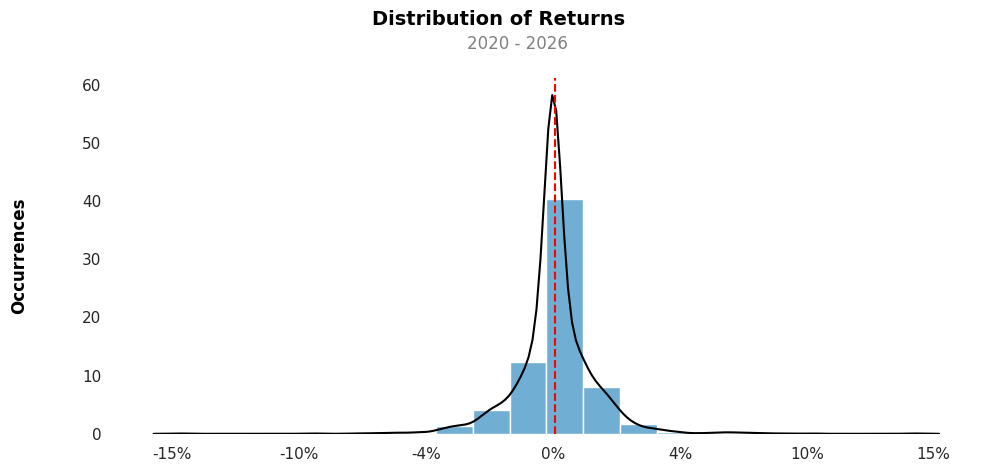


Google Daily Returns Histogram


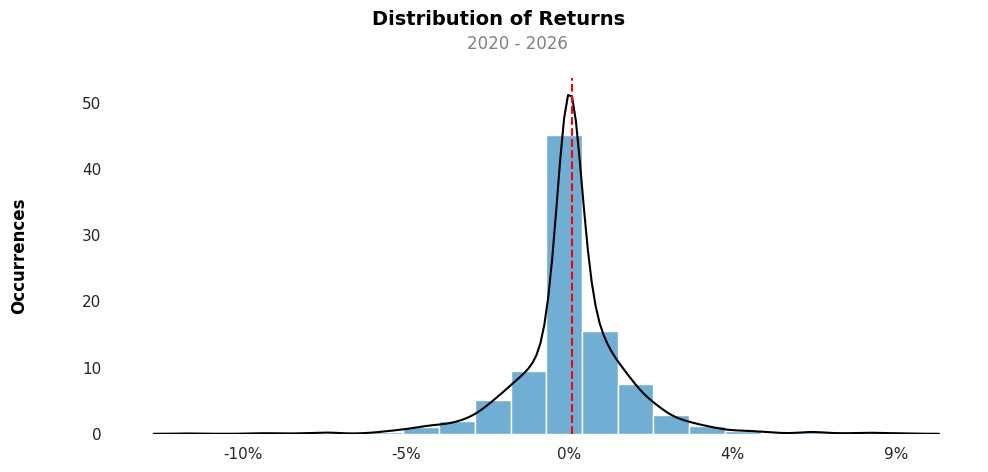


Amazon Daily Returns Histogram


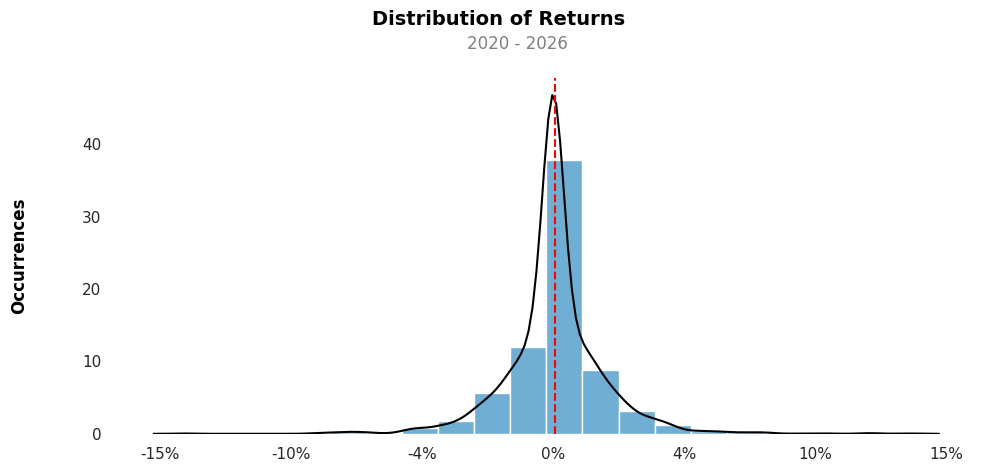


Meta Daily Returns Histogram


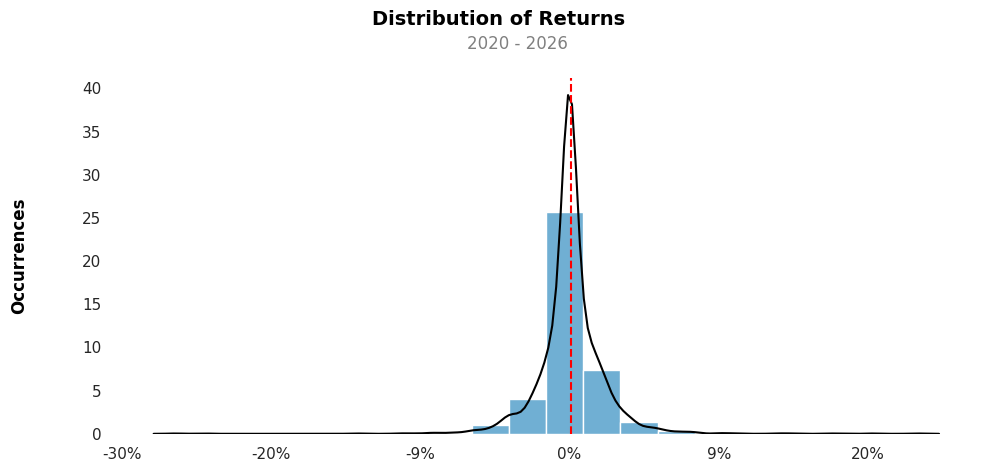


NVIDIA Daily Returns Histogram


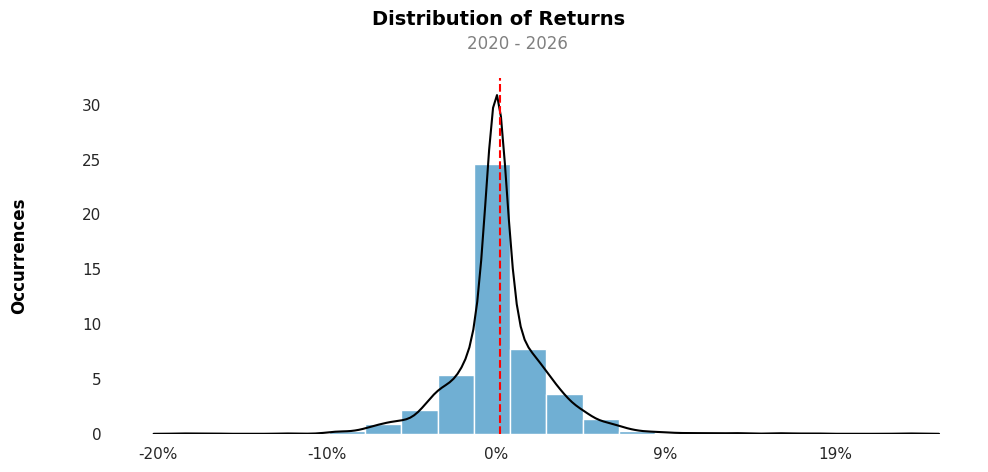


Tesla Daily Returns Histogram


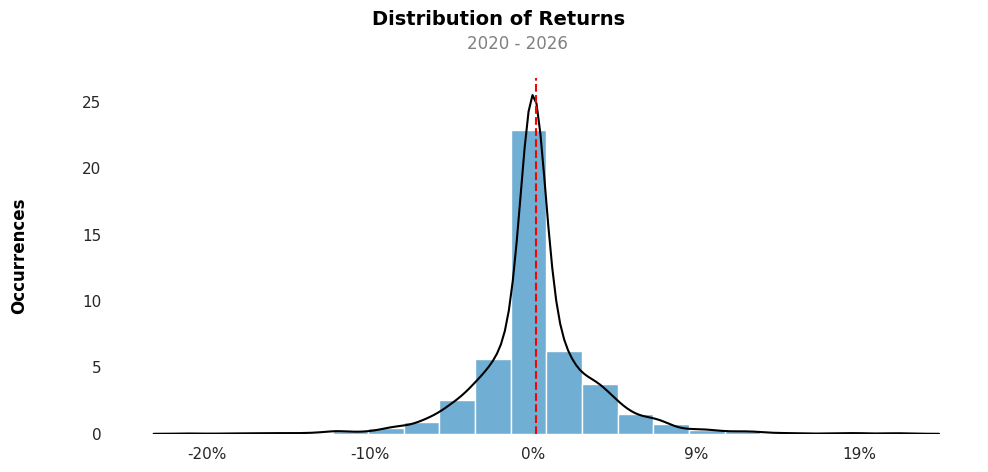


JPMorgan Chase Daily Returns Histogram


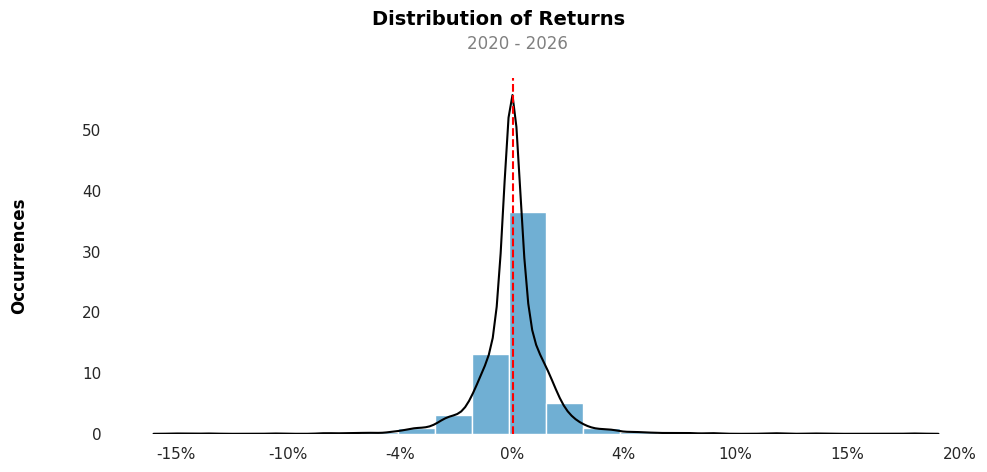


Visa Daily Returns Histogram


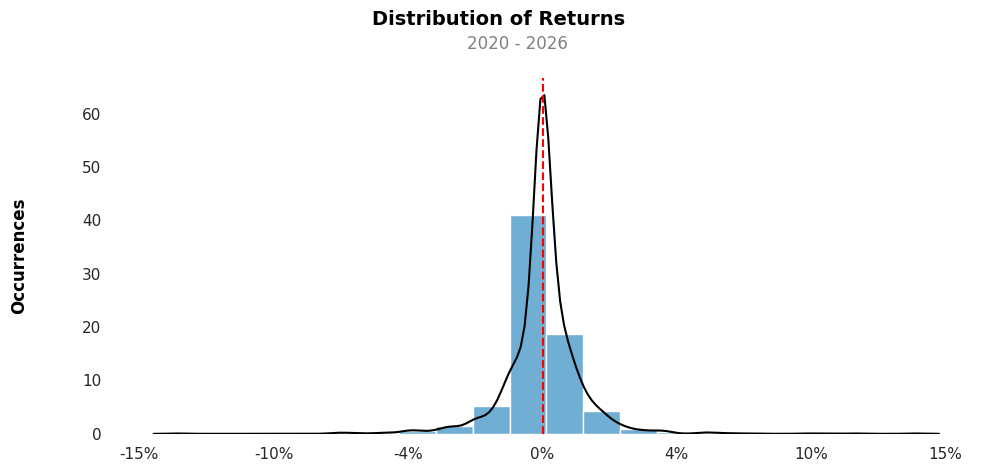


Walmart Daily Returns Histogram


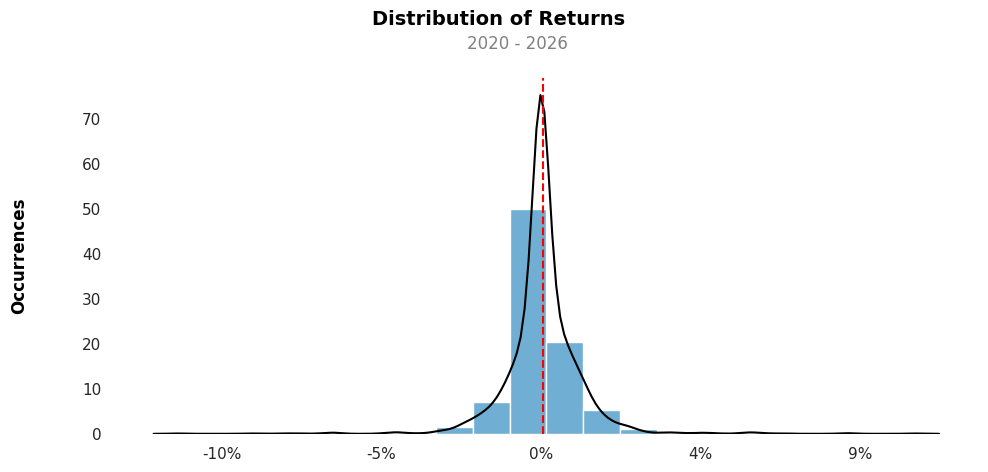


Johnson & Johnson Daily Returns Histogram


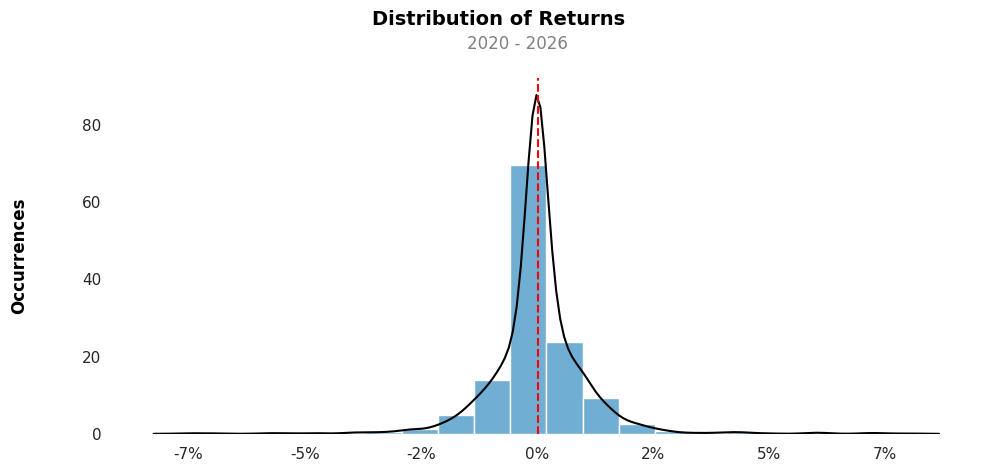


Exxon Mobil Daily Returns Histogram


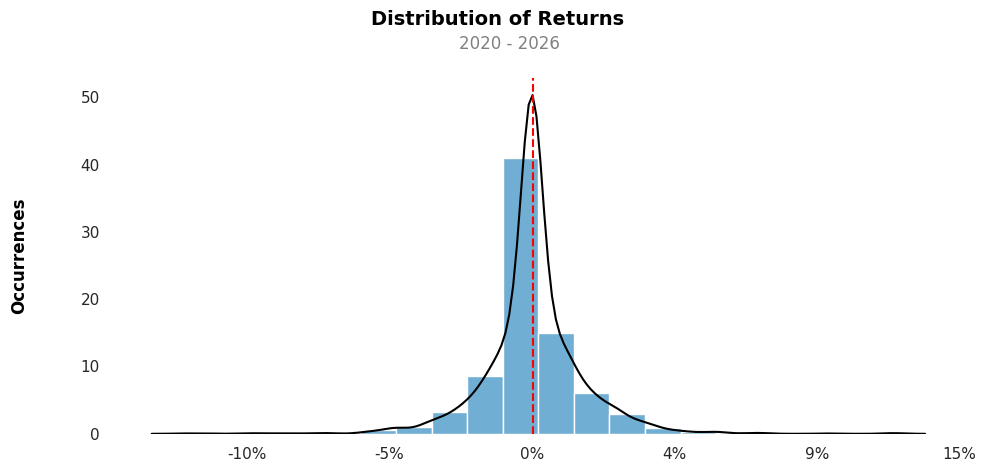


TSMC Daily Returns Histogram


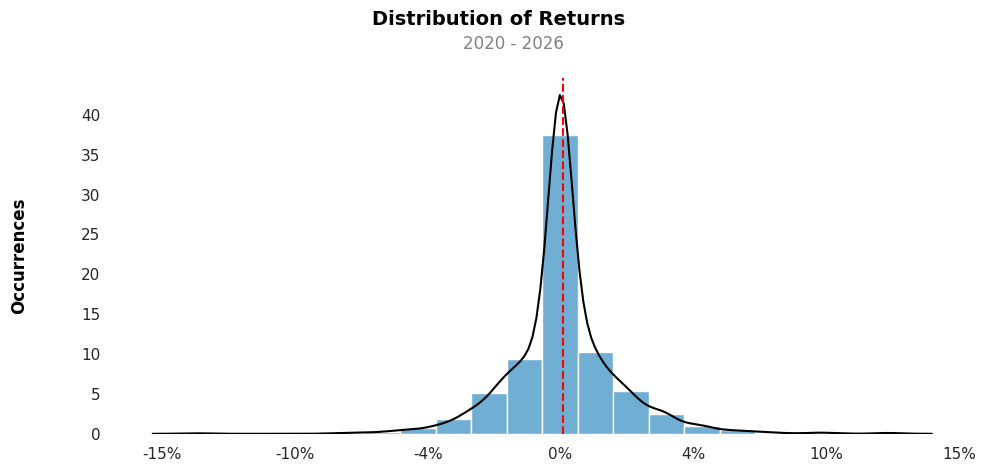


Coca-Cola Daily Returns Histogram


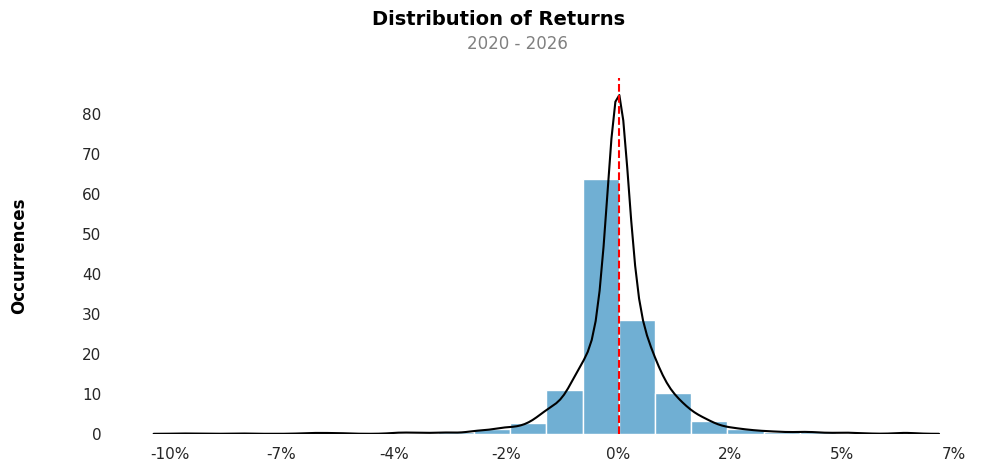


McDonald's Daily Returns Histogram


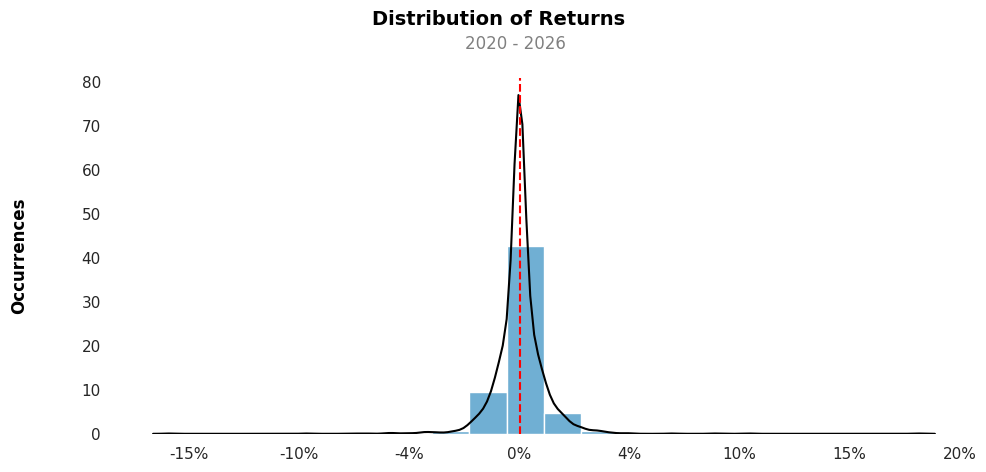

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import quantstats as qs

# ---------------------------
# Suppress Arial font warnings
# ---------------------------
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# The DataFrame `df` is already indexed by 'Date' from previous steps,
# so these lines are redundant and cause the KeyError.
# Removed: df['Date'] = pd.to_datetime(df['Date'])
# Removed: df.set_index('Date', inplace=True)

# Ensure df has a DatetimeIndex again, as it was reset earlier
# df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

# ---------------------------
# Calculate daily returns per ticker
# ---------------------------
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change()

# ---------------------------
# List of tickers and full names
# ---------------------------
tickers = {
    'AAPL' : 'Apple',
    'MSFT' : 'Microsoft',
    'GOOGL': 'Google',
    'AMZN' : 'Amazon',
    'META' : 'Meta',
    'NVDA' : 'NVIDIA',
    'TSLA' : 'Tesla',
    'JPM'  : 'JPMorgan Chase',
    'V'    : 'Visa',
    'WMT'  : 'Walmart',
    'JNJ'  : 'Johnson & Johnson',
    'XOM'  : 'Exxon Mobil',
    'TSM'  : 'TSMC',
    'KO'   : 'Coca-Cola',
    'MCD'  : "McDonald's"
}

# ---------------------------
# Plot histograms for each ticker
# ---------------------------
for ticker, name in tickers.items():
    returns = df[df['Ticker'] == ticker]['Daily Return'].dropna()

    # ✅ The index is already DatetimeIndex if df is correctly indexed, so this line is redundant or causes issues if df is not indexed by date.
    # returns.index = pd.to_datetime(returns.index) # This line is removed as df will be properly indexed by Date

    if returns.empty:
        print(f"No return data for {name}")
        continue

    print(f"\n{name} Daily Returns Histogram")
    qs.plots.histogram(returns, resample='D')

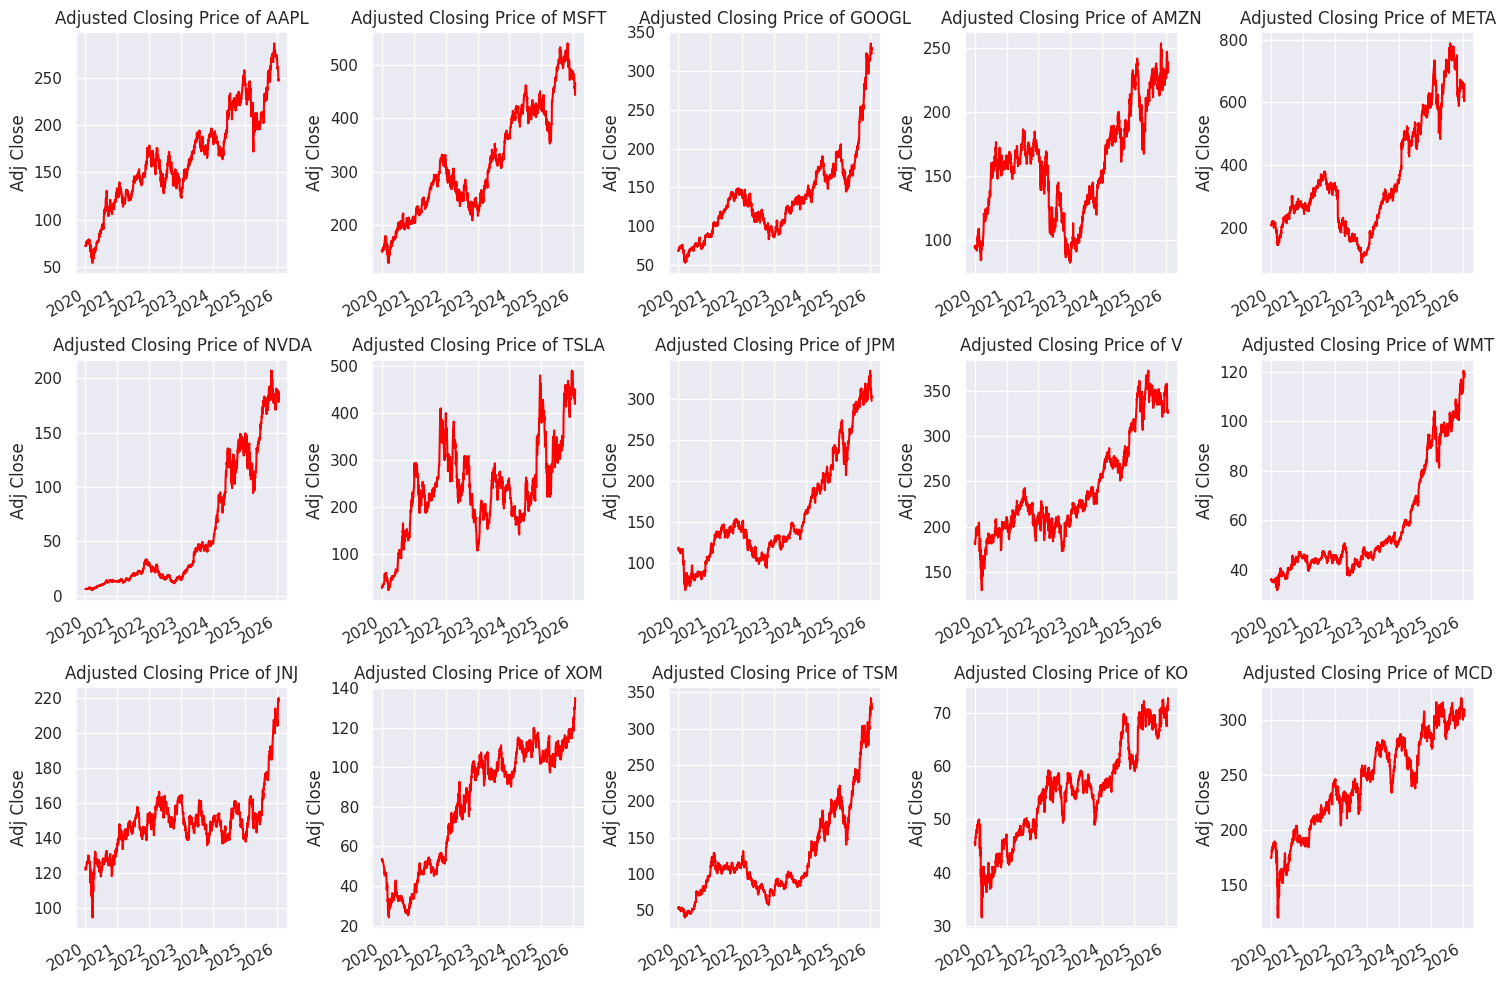

In [17]:
# Create a dictionary for the company DataFrames and their corresponding tickers
companies = {
    'AAPL': df[df['Ticker'] == 'AAPL'],
    'MSFT': df[df['Ticker'] == 'MSFT'],
    'GOOGL': df[df['Ticker'] == 'GOOGL'],
    'AMZN': df[df['Ticker'] == 'AMZN'],
    'META': df[df['Ticker'] == 'META'],
    'NVDA': df[df['Ticker'] == 'NVDA'],
    'TSLA': df[df['Ticker'] == 'TSLA'],
    'JPM': df[df['Ticker'] == 'JPM'],
    'V': df[df['Ticker'] == 'V'],
    'WMT': df[df['Ticker'] == 'WMT'],
    'JNJ': df[df['Ticker'] == 'JNJ'],
    'XOM': df[df['Ticker'] == 'XOM'],
    'TSM': df[df['Ticker'] == 'TSM'],
    'KO': df[df['Ticker'] == 'KO'],
    'MCD': df[df['Ticker'] == 'MCD']
}


plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Iterate over the companies dictionary to plot the adjusted closing prices
for i, (ticker, company_data) in enumerate(companies.items(), 1):
    plt.subplot(3, 5, i) # Changed from 2, 2 to 3, 5
    company_data['Adj Close'].plot(color='red', legend=False)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Adjusted Closing Price of {ticker}")

plt.tight_layout()
plt.show()

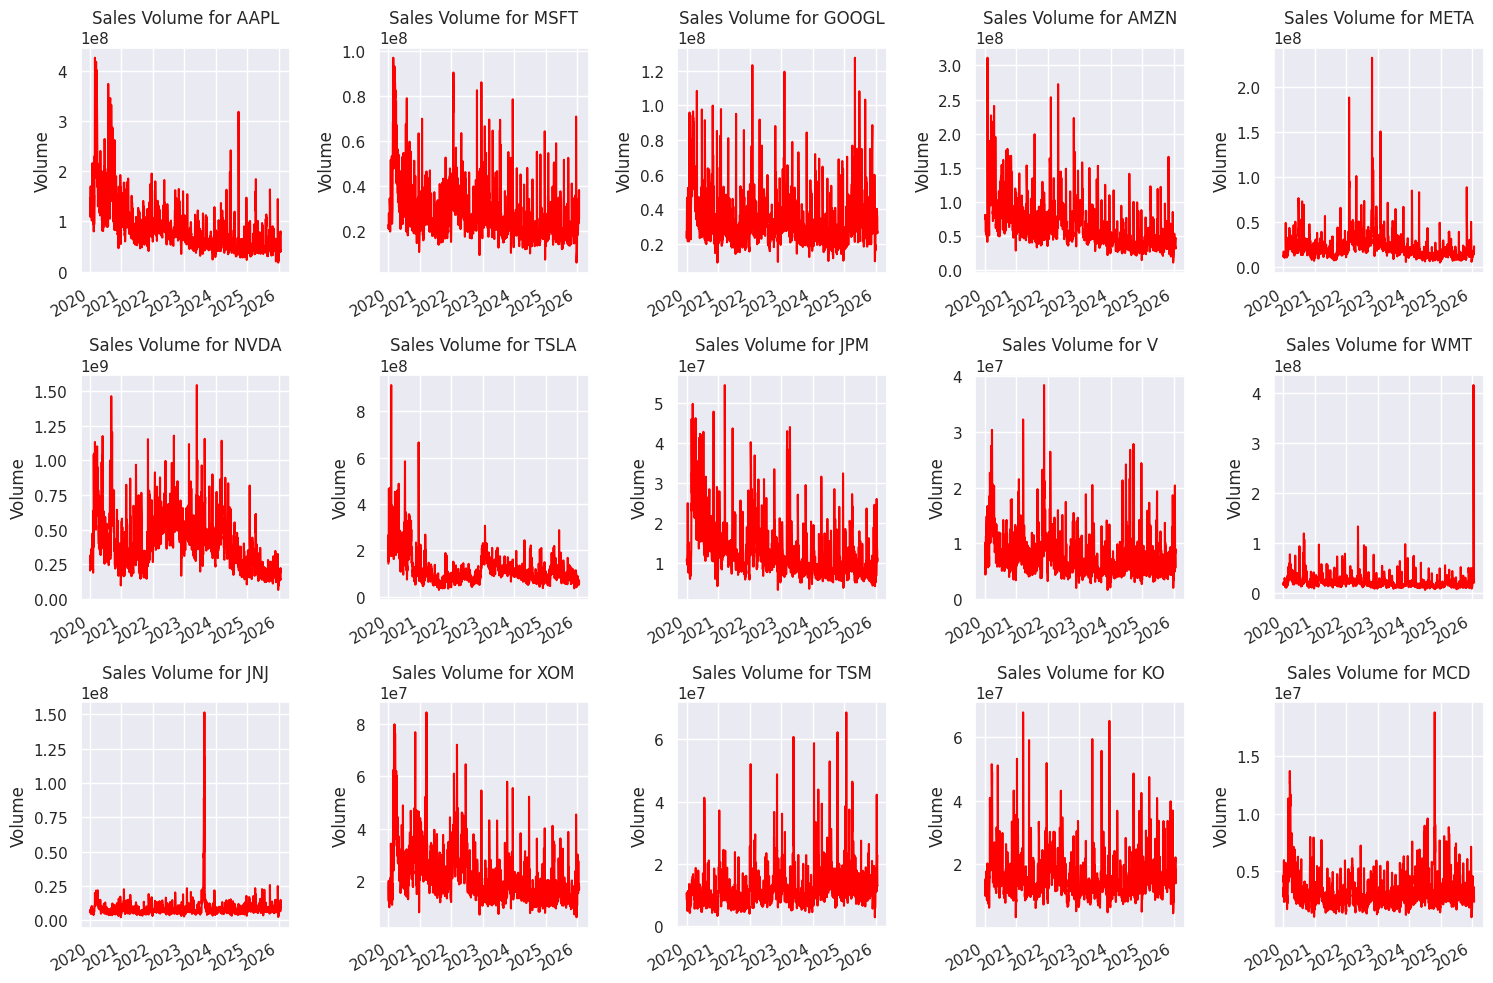

In [18]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.9, bottom=0.1)

# Loop through company_list and tech_list to plot the volume
for i, (ticker,company) in enumerate(companies.items(), 1):
    plt.subplot(3, 5, i)
    company['Volume'].plot(color='red', legend=False)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")

plt.tight_layout()
plt.show()


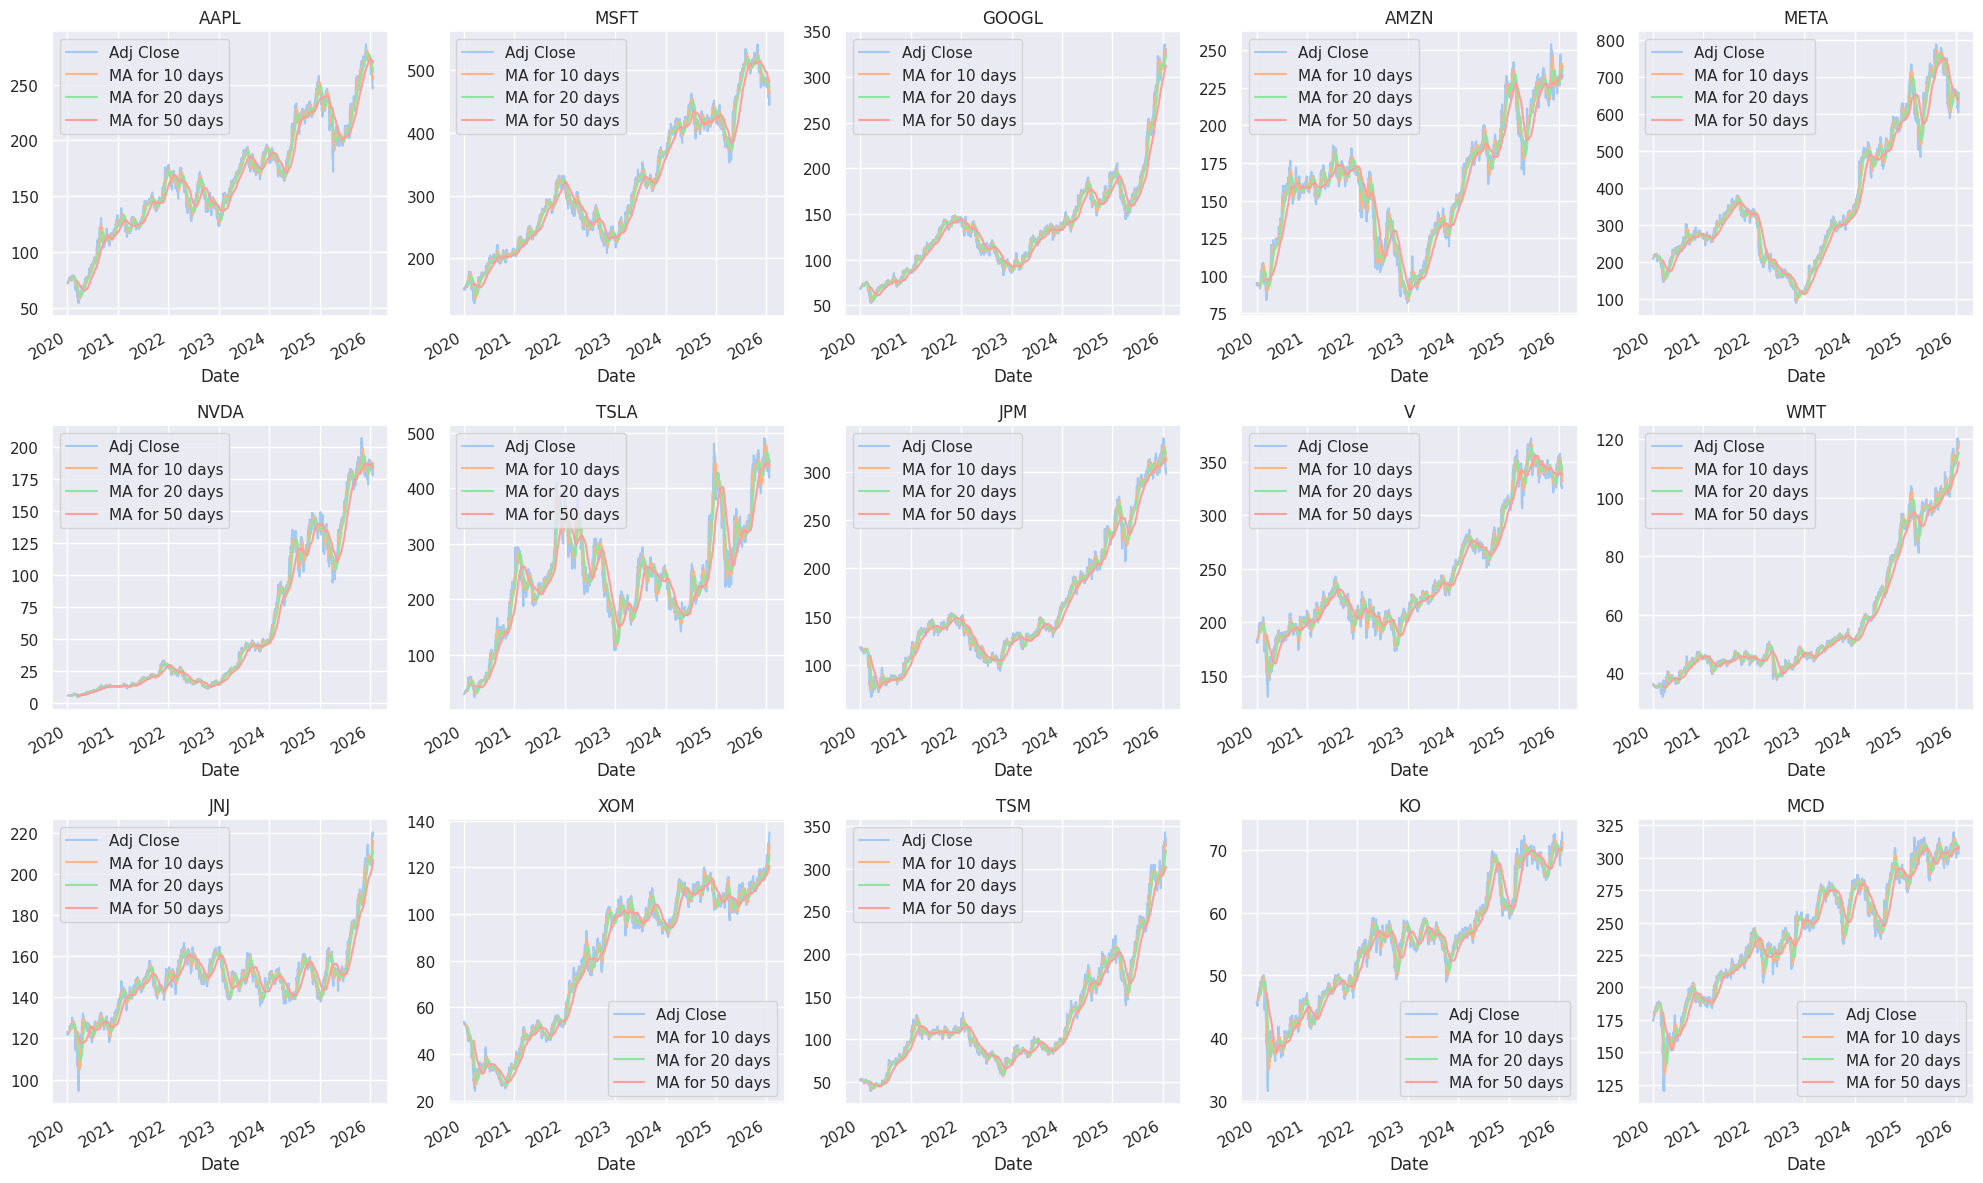

In [19]:
# Define the moving average days
ma_day = [10, 20, 50]

# Compute moving averages for each company
for ma in ma_day:
    for ticker, company in companies.items():
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots with a 3x5 grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12)) # Changed to 3x5 grid and adjusted figsize
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot for each company using a loop to assign plots to the flattened axes
for i, ticker in enumerate(companies.keys()):
    companies[ticker][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
    axes[i].set_title(ticker)

# Adjust layout
fig.tight_layout()
plt.show()


In [20]:
# Pivot the DataFrame to get 'Adj Close' values for each company as columns
adj_close_df = df.pivot_table(values='Daily Return', index='Date', columns='Ticker')
adj_close_df

Ticker          AAPL      AMZN     GOOGL       JNJ       JPM        KO  \
Date                                                                     
2020-01-03 -0.009722 -0.012139 -0.005231 -0.011578 -0.013197 -0.005456   
2020-01-06  0.007968  0.014886  0.026654 -0.001247 -0.000795 -0.000366   
2020-01-07 -0.004703  0.002092 -0.001932  0.006107 -0.017001 -0.007682   
2020-01-08  0.016086 -0.007809  0.007118 -0.000138  0.007801  0.001844   
2020-01-09  0.021241  0.004799  0.010498  0.002966  0.003652  0.018215   
...              ...       ...       ...       ...       ...       ...   
2026-01-16 -0.010379  0.003947 -0.008354 -0.004144  0.010380 -0.000568   
2026-01-20 -0.034556 -0.033958 -0.024242 -0.002058 -0.031139  0.018597   
2026-01-21  0.003851  0.001342  0.019814 -0.000917 -0.002312  0.003624   
2026-01-22  0.002827  0.013099  0.006578  0.002202  0.005264 -0.001944   
2026-01-23 -0.001248  0.020568 -0.007896  0.007552 -0.019464  0.014053   

Ticker           MCD      META      MSFT      NVDA      TSLA       TSM  \
Date                                                                     
2020-01-03 -0.003536 -0.005291 -0.012452 -0.016006  0.029633 -0.032978   
2020-01-06  0.011245  0.018834  0.002585  0.004194  0.019255 -0.011540   
2020-01-07  0.001483  0.002164 -0.009118  0.012107  0.038801  0.016205   
2020-01-08  0.016187  0.010138  0.015928  0.001876  0.049205  0.007373   
2020-01-09  0.011850  0.014311  0.012493  0.010983 -0.021945  0.008170   
...              ...       ...       ...       ...       ...       ...   
2026-01-16 -0.003856 -0.000886  0.007007 -0.004384 -0.002440  0.002225   
2026-01-20 -0.014930 -0.026006 -0.011612 -0.043817 -0.041714 -0.044509   
2026-01-21  0.009411  0.014633 -0.022903  0.029483  0.029076 -0.003179   
2026-01-22  0.001112  0.056562  0.015829  0.008291  0.041535  0.003833   
2026-01-23  0.010522  0.017186  0.032828  0.015311 -0.000668  0.022910   

Ticker             V       WMT       XOM  
Date                                      
2020-01-03 -0.007953 -0.008828 -0.008040  
2020-01-06 -0.002162 -0.002035  0.007678  
2020-01-07 -0.002643 -0.009265 -0.008184  
2020-01-08  0.017118 -0.003432 -0.015080  
2020-01-09  0.006930  0.010331  0.007656  
...              ...       ...       ...  
2026-01-16  0.001678  0.004195  0.005885  
2026-01-20 -0.007554 -0.008271  0.004388  
2026-01-21 -0.001657  0.005476  0.024145  
2026-01-22  0.003320 -0.012818  0.000225  
2026-01-23 -0.000552 -0.000849  0.009952  

[1522 rows x 15 columns]

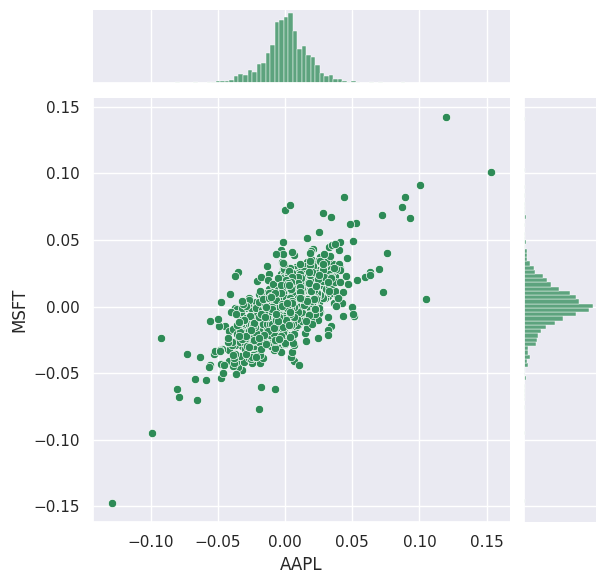

In [21]:
sns.jointplot(x='AAPL', y='MSFT', data=adj_close_df, kind='scatter', color='seagreen')

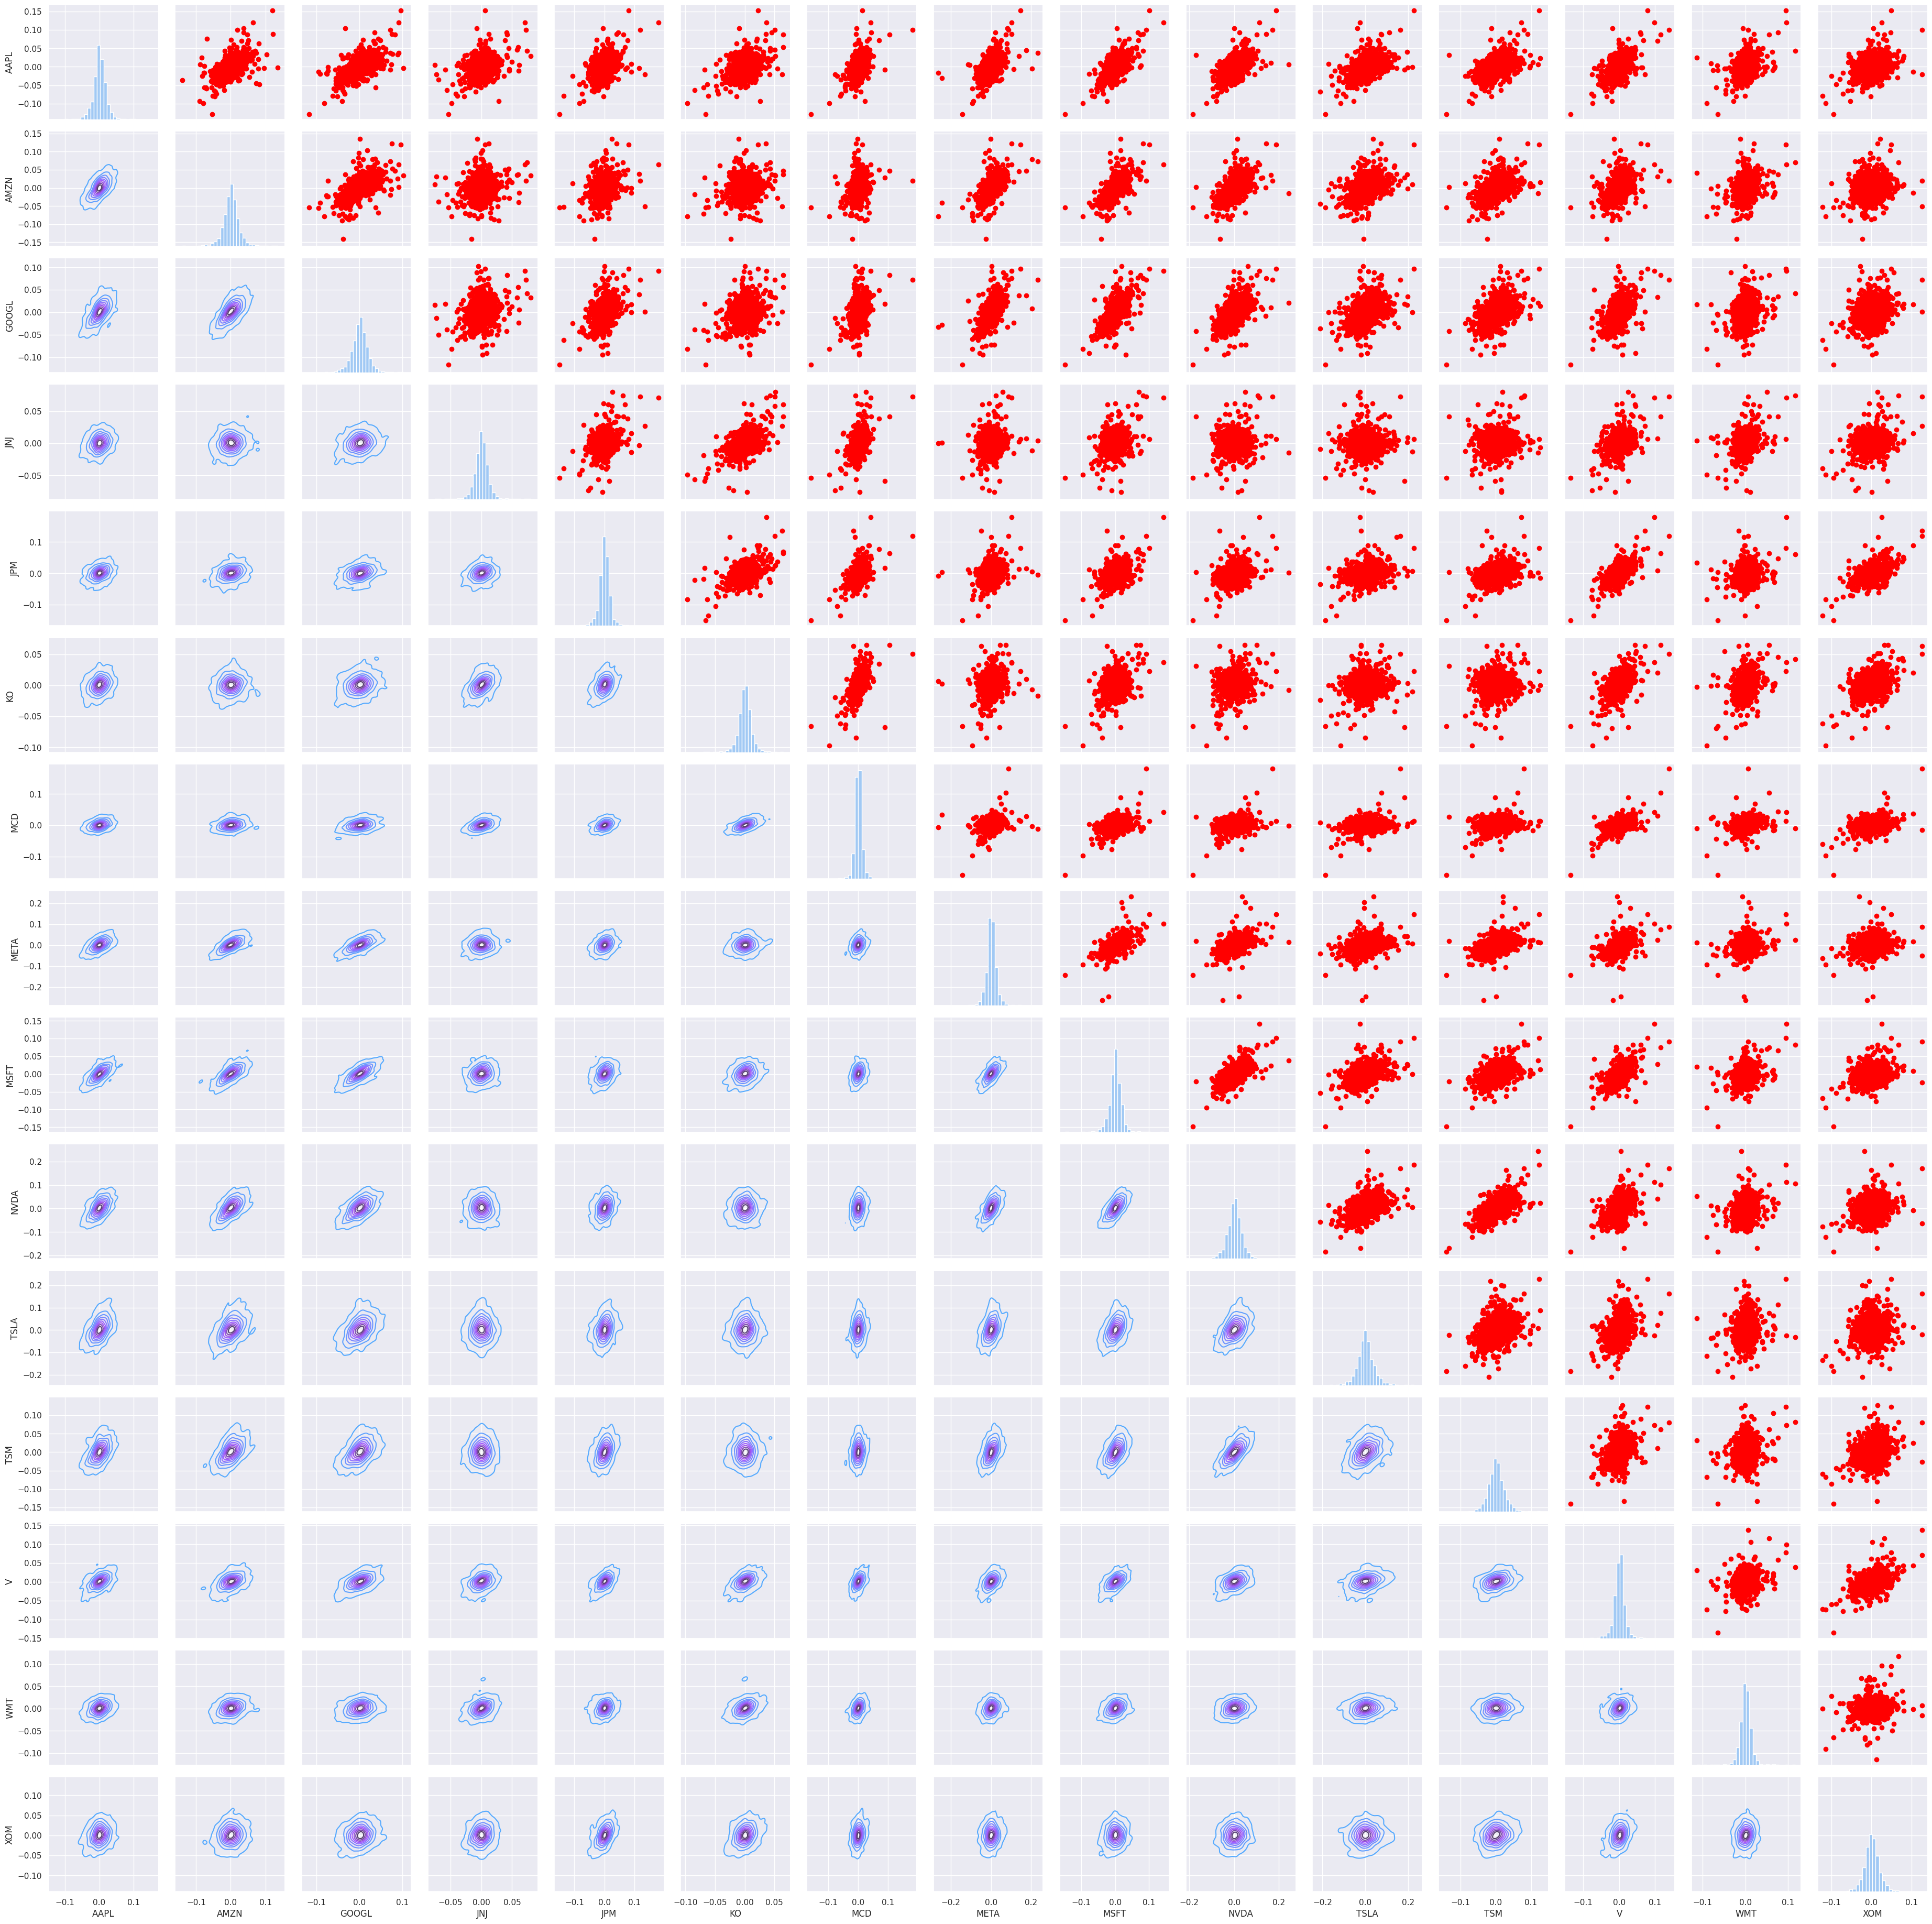

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(adj_close_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='red')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

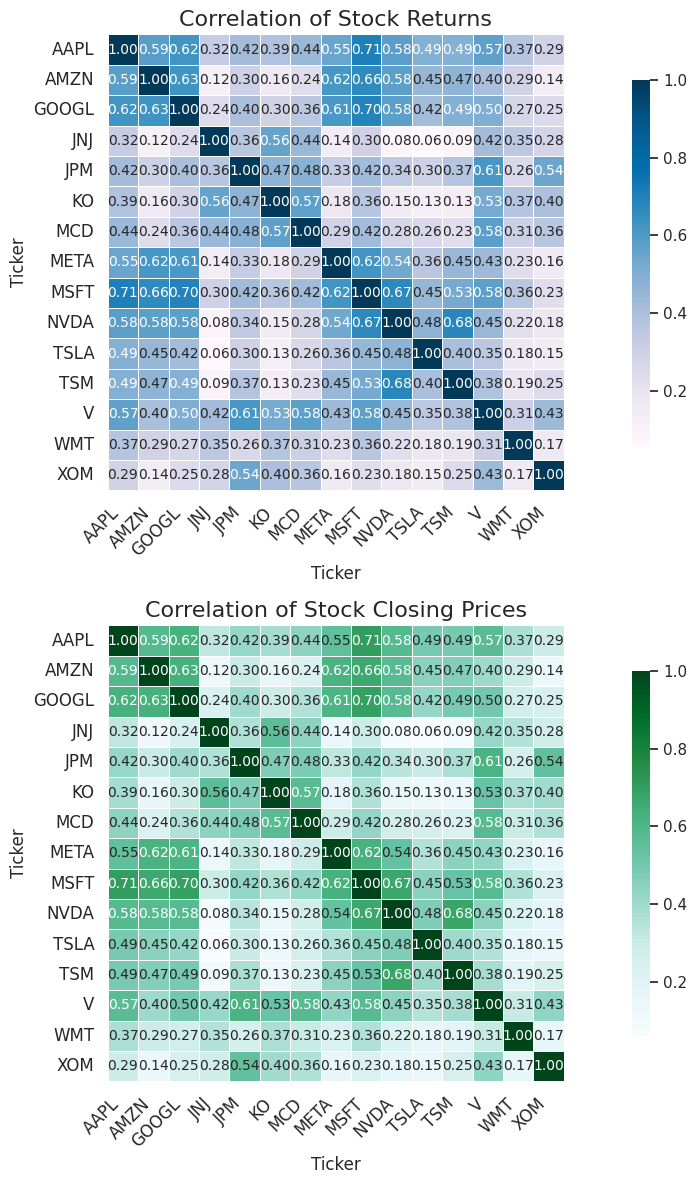

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14, 12))  # Larger figure

# Compute correlation once
corr = adj_close_df.corr()

# First heatmap
plt.subplot(2, 1, 1)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='PuBu', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}, annot_kws={"size":10})
plt.title('Correlation of Stock Returns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Second heatmap
plt.subplot(2, 1, 2)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='BuGn', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8}, annot_kws={"size":10})
plt.title('Correlation of Stock Closing Prices', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


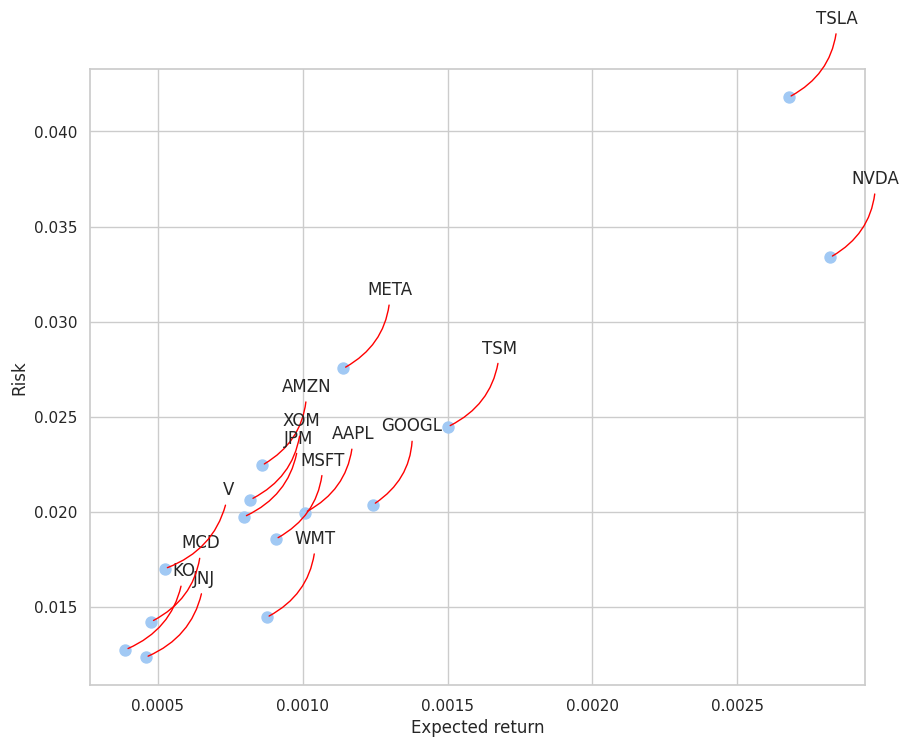

In [24]:
rets = adj_close_df.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))

In [25]:
df = yf.download('AAPL', start='2020-01-01', end=datetime.now(),auto_adjust=False)
# Reshape the DataFrame so tickers appear in rows
df.columns =df.columns.droplevel(1)

#df=df.set_index('Date')
# Step 2: Filter only the relevant columns (Price, Adj Close, Close, High, Low, Open, Volume)
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


# Display the reshaped DataFrame
df.tail(10)

[*********************100%***********************]  1 of 1 completed


Price             Open        High         Low       Close   Adj Close  \
Date                                                                     
2026-01-09  259.079987  260.209991  256.220001  259.369995  259.369995   
2026-01-12  259.160004  261.299988  256.799988  260.250000  260.250000   
2026-01-13  258.720001  261.809998  258.390015  261.049988  261.049988   
2026-01-14  259.489990  261.820007  256.709991  259.959991  259.959991   
2026-01-15  260.649994  261.040009  257.049988  258.209991  258.209991   
2026-01-16  257.899994  258.899994  254.929993  255.529999  255.529999   
2026-01-20  252.729996  254.789993  243.419998  246.699997  246.699997   
2026-01-21  248.699997  251.559998  245.179993  247.649994  247.649994   
2026-01-22  249.199997  251.000000  248.149994  248.350006  248.350006   
2026-01-23  247.320007  249.410004  244.679993  248.039993  248.039993   

Price         Volume  
Date                  
2026-01-09  39997000  
2026-01-12  45263800  
2026-01-13  45730800  
2026-01-14  40019400  
2026-01-15  39388600  
2026-01-16  72142800  
2026-01-20  80267500  
2026-01-21  54641700  
2026-01-22  39708300  
2026-01-23  41625700

In [26]:
import pandas as pd

def extracting_features(df):
    """Extracts key financial indicators from a Yahoo Finance dataset."""

    df = df.copy()

    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Price Change (Close - Open)
    df['price_change'] = df['Close'] - df['Open']

    # Returns (Daily Percentage Change)
    df['returns'] = df['Close'].pct_change()

    # Average Price
    df['average_price'] = (df['Close'] + df['Open']) / 2

    # Price Range (High - Low)
    df['price_range'] = df['High'] - df['Low']

    # Volume Change
    df['volume_change'] = df['Volume'].diff()

    # Moving Average
    df['moving_average_10'] = df['Close'].rolling(window=10).mean()

    # Relative Strength Index (RSI)
    window = 14
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD (Moving Average Convergence Divergence)
    short_ema = df['Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Bollinger Bands (20-Day Moving Average ± 2 Standard Deviations)
    df['20_SMA'] = df['Close'].rolling(window=20).mean()
    df['BB_Upper'] = df['20_SMA'] + (df['Close'].rolling(window=20).std() * 2)
    df['BB_Lower'] = df['20_SMA'] - (df['Close'].rolling(window=20).std() * 2)

    # Fill missing values with 0 (especially for rolling indicators)
    df.fillna(0, inplace=True)

    return df

def is_spring(ds):
    """Check if the date falls in Spring (March-May)."""
    date = pd.to_datetime(ds)
    return int(3 <= date.month <= 5)

def is_summer(ds):
    """Check if the date falls in Summer (June-August)."""
    date = pd.to_datetime(ds)
    return int(6 <= date.month <= 8)

def is_autumn(ds):
    """Check if the date falls in Autumn (September-November)."""
    date = pd.to_datetime(ds)
    return int(9 <= date.month <= 11)

def is_winter(ds):
    """Check if the date falls in Winter (December-February)."""
    date = pd.to_datetime(ds)
    return int(date.month == 12 or date.month <= 2)

def add_season(df):
    """Add seasonal indicators to the dataframe."""
    df = df.copy()

    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Apply seasonal functions
    df['is_spring'] = df['Date'].apply(is_spring)
    df['is_summer'] = df['Date'].apply(is_summer)
    df['is_autumn'] = df['Date'].apply(is_autumn)
    df['is_winter'] = df['Date'].apply(is_winter)

    return df

# Example Usage
df=df.reset_index()
df = extracting_features(df)  # Extract features
df = add_season(df)  # Add seasonal indicators


In [27]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values,autolag='AIC')

    print('ADF Statistic: %f' % result[0])
    print(f'n_lags: {result[1]}')
    print(f'p-value:  {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
values= ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for i in values:
    print(f' {i}')
    print('--------------')
    check_stationarity(df[i])

 Open
--------------
ADF Statistic: -1.366999
n_lags: 0.5979910829127324
p-value:  0.5979910829127324
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 High
--------------
ADF Statistic: -1.386125
n_lags: 0.5889096855346143
p-value:  0.5889096855346143
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Low
--------------
ADF Statistic: -1.428588
n_lags: 0.5684965326060473
p-value:  0.5684965326060473
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Close
--------------
ADF Statistic: -1.382339
n_lags: 0.5907132438809937
p-value:  0.5907132438809937
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Adj Close
--------------
ADF Statistic: -1.328482
n_lags: 0.6160429226626982
p-value:  0.6160429226626982
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Non-stationary
 Volume
--------------
ADF Statistic: -3.610252
n_lags: 0.005568035346643047
p-value:  0.005568035346643047
Critical Values:
	1%: -3.435
	5%

[ 1.          0.9506959   0.90137421  0.85212645  0.80307284  0.75424998
  0.70582602  0.65789433  0.61045355  0.56350358  0.51703351  0.47114418
  0.42576046  0.38101603  0.3368969   0.29344299  0.25072674  0.20867716
  0.16741686  0.12689514  0.08725947  0.04862906  0.01120132 -0.02493763
 -0.05983131 -0.09335304 -0.12548413 -0.15619643 -0.1854917  -0.21324884
 -0.23946244 -0.26407791 -0.28703749 -0.30828703 -0.32772508 -0.34537344
 -0.36112682 -0.37490975 -0.3866248  -0.39628077 -0.40372668 -0.40893153
 -0.4119834  -0.41289714 -0.41172702 -0.40832584 -0.40271375 -0.39473043
 -0.38434712 -0.37151632 -0.35612973 -0.33821813 -0.31760082 -0.29427592
 -0.26812359 -0.23903173 -0.20688685 -0.17166114 -0.1334058  -0.09204025
 -0.04757494]


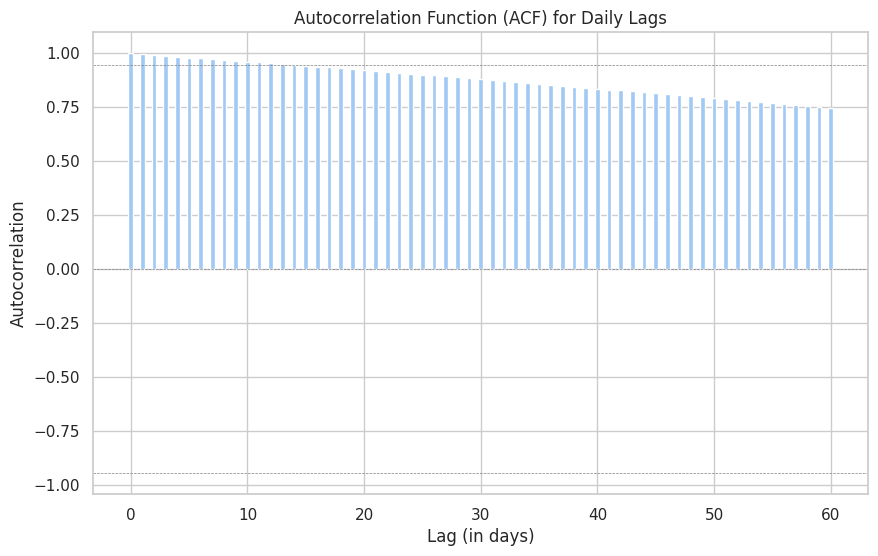

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# and a corresponding DateTime index representing weekly dates

# Compute the autocorrelation function (ACF)
acf_values, confidence_interval = sm.tsa.acf(df['Close'], nlags=60, alpha=0.05)
print(acf(acf_values,nlags=60))
# Plot the ACF
plt.figure(figsize=(10, 6))
plt.bar(range(len(acf_values)), acf_values, width=0.4)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=-confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=confidence_interval[1][0], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Lag (in days)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) for Daily Lags')
plt.show()

In [29]:
# Function to normalize data using MinMax Scaling for all features
def min_max_scaling(data):
    """Applies Min-Max scaling to normalize all features (Open, High, Low, Close, Adj Close, Volume)."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)  # Normalize all features
    print("Data normalization using Min-Max Scaling completed.")
    return scaler, scaled_data


In [30]:
columns_to_scale = df.columns.difference(["Date"])  # Exclude Date column
scaler, normalized_data = min_max_scaling(df[columns_to_scale])
new_df = pd.DataFrame(normalized_data, columns=columns_to_scale, index=df.index)  # Keep original index2
new_df["Date"] = df.index
new_df["Date"] = df["Date"].values
new_df=new_df.set_index('Date')
new_df=new_df.fillna(0)

Data normalization using Min-Max Scaling completed.


In [31]:
def denormalize_predictions(y_pred, df):
    """
    Denormalize the predicted values using the MinMaxScaler fitted on the original data.

    Args:
        y_pred (np.array): The normalized predicted stock values.
        df (pd.DataFrame): The original dataframe containing the stock prices.

    Returns:
        np.array: The denormalized predicted values.
    """
    # Extract 'Close' column from the dataframe, which was used for normalization
    close_prices = df['Close'].values.reshape(-1, 1)  # Reshape to (n_samples, 1)

    # Create a MinMaxScaler and fit it using the 'Close' prices
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(close_prices)  # Fit the scaler on the 'Close' price column

    # Apply the inverse_transform to denormalize the predicted values
    y_pred_denormalized = scaler.inverse_transform(y_pred.reshape(-1, 1))  # Denormalize predictions

    return y_pred_denormalized.flatten()  # Flatten to return a 1D array


In [32]:
def split_and_reshape_data(dataframe, pred_days, company):
    """
    Splits the dataset into training and testing sets, then reshapes it for LSTM models.

    Parameters:
        dataframe (pandas DataFrame): Scaled dataset.
        pred_days (int): Number of previous days used for prediction.
        company (str): Company name.

    Returns:
        X_train, y_train, X_test, y_test: Reshaped datasets for model training and testing.
    """
    prediction_days = pred_days

    train_size = int(np.ceil(len(dataframe) * 0.70))  # 70% for training data
    test_size = len(dataframe) - train_size  # Remaining 30% for testing data
    print(f'The training size for {company} is {train_size} rows')
    print(f'The testing size for {company.title()} is {test_size} rows')

    # Use .iloc[] for proper slicing of pandas DataFrame
    train_data = dataframe.iloc[0: train_size, :]  # Use iloc for slicing DataFrame
    test_data = dataframe.iloc[train_size - prediction_days:, :]  # Use iloc for slicing DataFrame

    X_train, y_train, X_test, y_test = [], [], [], []

    # Loop to create X_train and y_train for training data
    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data.iloc[i - prediction_days: i, :].values)  # Features: previous 'pred_days' values for all columns
        y_train.append(train_data.iloc[i, 3])  # Target: next day's 'Close' value (index 3 corresponds to 'Close')

    # Loop to create X_test and y_test for testing data
    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data.iloc[i - prediction_days: i, :].values)  # Features: previous 'pred_days' values for all columns
        y_test.append(test_data.iloc[i, 3])  # Target: next day's 'Close' value (index 3 corresponds to 'Close')

    # Convert the lists to numpy arrays
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

    # Reshape the data to be suitable for LSTM model (3D array: samples, time steps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))  # Number of features (columns) will be dynamic
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))  # Same for test data

    print(f'Data for {company.title()} split successfully')

    return X_train, y_train, X_test, y_test


stock_name = 'Apple'
X_train, y_train, X_test, y_test = split_and_reshape_data(new_df, 30, stock_name)


The training size for Apple is 1067 rows
The testing size for Apple is 456 rows
Data for Apple split successfully


In [33]:
df=df.set_index('Date')

[I 2026-01-26 13:25:53,494] A new study created in memory with name: no-name-dd263ab9-4f35-4fdf-ad8e-4c4ef2804ccb


Shapes of X_train, X_test, y_train, y_test: (1218, 11) (305, 11) (1218,) (305,)


[I 2026-01-26 13:25:53,542] Trial 0 finished with value: 0.8041069595185846 and parameters: {'alpha': 0.013838335641019097}. Best is trial 0 with value: 0.8041069595185846.
[I 2026-01-26 13:25:53,592] Trial 1 finished with value: 0.8041057536118599 and parameters: {'alpha': 0.0026593598499874828}. Best is trial 1 with value: 0.8041057536118599.
[I 2026-01-26 13:25:53,627] Trial 2 finished with value: 0.804105954332184 and parameters: {'alpha': 0.004520064942180538}. Best is trial 1 with value: 0.8041057536118599.
[I 2026-01-26 13:25:53,659] Trial 3 finished with value: 0.8041057795859464 and parameters: {'alpha': 0.0029001431033725783}. Best is trial 1 with value: 0.8041057536118599.
[I 2026-01-26 13:25:53,692] Trial 4 finished with value: 0.8044435657860788 and parameters: {'alpha': 2.9995925128001106}. Best is trial 1 with value: 0.8041057536118599.
[I 2026-01-26 13:25:53,724] Trial 5 finished with value: 0.8041841613027257 and parameters: {'alpha': 0.7226972692942646}. Best is trial


Best Alpha: 0.00010

Metrics:
+-------------------------+----------+
| Metric                  |    Value |
|-------------------------+----------|
| Mean Absolute Error     | 0.751832 |
| Mean Squared Error      | 1.08598  |
| Root Mean Squared Error | 1.04211  |
| R^2 Score               | 0.999541 |
+-------------------------+----------+


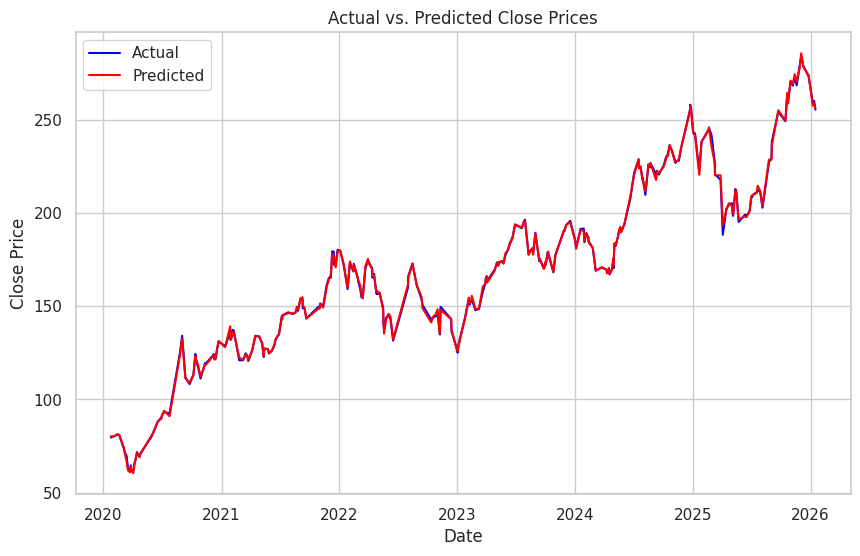

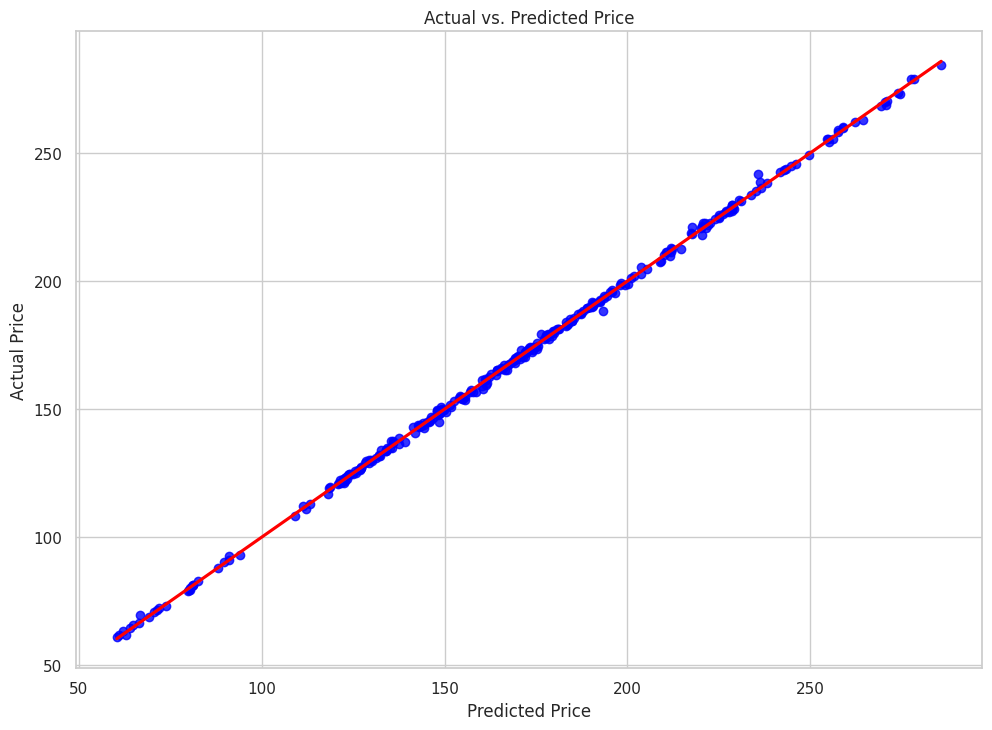

In [34]:

def objective(trial, X_train, y_train):
    """Objective function for Optuna hyperparameter tuning."""
    alpha = trial.suggest_loguniform('alpha', 1e-4, 10)  # Regularization strength

    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

    return -scores.mean()  # Minimize MAE

def linear_prediction(df):
    """
    Train a Ridge Regression model with hyperparameter tuning using Optuna.

    Args:
        df (pd.DataFrame): DataFrame containing stock features and target ('Close' price).

    Returns:
        Best model, performance metrics, and comparison DataFrame.
    """
    # Define features and target
    X = df[['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    y = df['Close']
    X=X.fillna(X.mean())

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Shapes of X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Optuna optimization
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=30)

    best_alpha = study.best_params['alpha']
    print(f"\nBest Alpha: {best_alpha:.5f}")

    # Train Ridge model with best hyperparameter
    regressor = Ridge(alpha=best_alpha)
    regressor.fit(X_train, y_train)

    # Predictions
    y_pred = regressor.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Create comparison DataFrame
    compare = pd.DataFrame({'Date': y_test.index, 'Actual': y_test.values, 'Predicted': y_pred})
    compare.set_index('Date', inplace=True)
    compare = compare.sort_index()

    # Display metrics
    metrics_data = [['Mean Absolute Error', mae], ['Mean Squared Error', mse],
                    ['Root Mean Squared Error', rmse], ['R^2 Score', r2]]
    print("\nMetrics:")
    print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='psql'))

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(compare.index, compare['Actual'], label='Actual', color='blue')
    plt.plot(compare.index, compare['Predicted'], label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Close Prices')
    plt.legend()
    plt.show()

    # Regression plot
    sns.regplot(x=y_pred.flatten(), y=y_test.values.flatten(), scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Actual vs. Predicted Price')
    plt.show()

    return regressor, mae, mse, rmse, r2, compare,best_alpha

# Call the function
regressor, mae, mse, rmse, r2, comparison_d,best_alpha = linear_prediction(df)


In [35]:
def linear_forecasting(df, future_days=60):
    # Define features and target
    X = df[['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    y = df['Close']
    X=X.fillna(0)
    # Normalize features using Min-Max scaling
    #scaler = MinMaxScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the linear regression model
    regressor = Ridge(best_alpha)
    regressor.fit(X, y)
    # Predicting for the future dates
    # Tarih indeksini datetime formatına çevir (eğer değilse)
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)


    # Predicting for the future dates
    future_dates = pd.date_range(df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_features = df.iloc[-1*future_days:][['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']]
    #future_features_scaled = scaler.transform(future_features)
    future_predictions = regressor.predict(future_features)

    # Creating a DataFrame for future predictions
    future_prediction_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted': future_predictions
    })
    future_prediction_df.set_index('Date', inplace=True)

    # Create figure with plotly
    fig = go.Figure()

    # Historical data trace
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines+markers', name='Historical Close'))

    # Future predictions trace
    fig.add_trace(go.Scatter(x=future_prediction_df.index, y=future_prediction_df['Predicted'], mode='lines+markers', name='Predicted Close'))

    # Update layout for better interactive controls
    fig.update_layout(
        title='Historical vs Predicted Close Prices',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            title="Close Price",
            autorange=True,
            type="linear"
        )
    )

    fig.show()

    return regressor, scaler, future_prediction_df

regressor, scaler, future_predictions = linear_forecasting(df,future_days=60)

# Print  future_predictions DataFrame
print("Future Predictions:"+ future_predictions)


Future Predictions:
             Predicted
Date                  
2026-01-26  269.041280
2026-01-27  269.247412
2026-01-28  271.037588
2026-01-29  271.090801
2026-01-30  267.559862
2026-02-02  270.393535
2026-02-03  269.884744
2026-02-04  272.368720
2026-02-05  269.356578
2026-02-06  271.534755
2026-02-09  274.797976
2026-02-10  273.100026
2026-02-11  274.625878
2026-02-12  273.697209
2026-02-13  267.521913
2026-02-16  266.681504
2026-02-17  270.581612
2026-02-18  270.304335
2026-02-19  271.449931
2026-02-20  275.674984
2026-02-23  279.273488
2026-02-24  278.760859
2026-02-25  277.695131
2026-02-26  280.801862
2026-02-27  286.185945
2026-03-02  285.797709
2026-03-03  280.148528
2026-03-04  279.006879
2026-03-05  277.832059
2026-03-06  278.725458
2026-03-09  278.374388
2026-03-10  275.373081
2026-03-11  278.180567
2026-03-12  274.216489
2026-03-13  274.059192
2026-03-16  273.134082
2026-03-17  268.182918
2026-03-18  272.076762
2026-03-19  271.527751
2026-03-20  270.944329
2026-03-23  27

In [36]:
import gc
def build_lstm_model(trial):
    model = Sequential()

    model.add(Conv1D(filters=trial.suggest_categorical('conv_filters', [16, 32, 64]),
                      kernel_size=3, strides=1, activation='relu', input_shape=[30, 22]))

    num_lstm_layers = trial.suggest_int('num_lstm_layers', 1, 3)
    for i in range(num_lstm_layers):
        model.add(Bidirectional(LSTM(trial.suggest_int(f'lstm_units_{i}', 32, 128),
                                      return_sequences=(i < num_lstm_layers - 1))))

        if trial.suggest_categorical(f'dropout_{i}', [True, False]):
            model.add(Dropout(rate=trial.suggest_float(f'dropout_rate_{i}', 0.1, 0.5)))

    model.add(Dense(trial.suggest_int('dense_units', 16, 64), activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)),
                  loss=Huber(), metrics=['mse', 'mae'])

    return model

def objective(trial):
    try:
        gc.collect()  # Free memory before training
        model = build_lstm_model(trial)

        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=50, batch_size=trial.suggest_categorical('batch_size', [16, 32, 64]),
                            callbacks=[early_stopping], verbose=0)

        val_mse = min(history.history['val_mse'])
        val_rmse = np.sqrt(val_mse)

        return val_rmse
    except Exception as e:
        print(f"Trial failed due to: {e}")
        return float("inf")  # Assign a high RMSE instead of failing

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

best_params = study.best_params
print('Best hyperparameters:', best_params)

def train_lstm_model(X_train, y_train, X_test, y_test, company):
    print(f'========= Training LSTM Model for {company} using Best Hyperparameters =========')

    model = Sequential()
    model.add(Conv1D(filters=best_params['conv_filters'], kernel_size=3, strides=1, activation='relu', input_shape=[30, 22]))

    for i in range(best_params['num_lstm_layers']):
        model.add(Bidirectional(LSTM(best_params[f'lstm_units_{i}'], return_sequences=(i < best_params['num_lstm_layers'] - 1))))

        if best_params.get(f'dropout_{i}', False):
            model.add(Dropout(rate=best_params[f'dropout_rate_{i}']))

    model.add(Dense(best_params['dense_units'], activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss=Huber(), metrics=['mse', 'mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                        batch_size=best_params['batch_size'], callbacks=[early_stopping])

    y_pred = model.predict(X_test)
    return model, history, y_pred

[I 2026-01-26 13:25:55,362] A new study created in memory with name: no-name-836cdce2-83a2-473d-8225-3737d409ac48
[I 2026-01-26 13:27:04,330] Trial 0 finished with value: 0.05193924368861764 and parameters: {'conv_filters': 32, 'num_lstm_layers': 2, 'lstm_units_0': 83, 'dropout_0': True, 'dropout_rate_0': 0.11460685152656698, 'lstm_units_1': 86, 'dropout_1': False, 'dense_units': 26, 'learning_rate': 0.0003338374841698382, 'batch_size': 32}. Best is trial 0 with value: 0.05193924368861764.
[I 2026-01-26 13:27:59,346] Trial 1 finished with value: 0.03895688083137307 and parameters: {'conv_filters': 32, 'num_lstm_layers': 2, 'lstm_units_0': 46, 'dropout_0': True, 'dropout_rate_0': 0.32871524564820287, 'lstm_units_1': 107, 'dropout_1': False, 'dense_units': 54, 'learning_rate': 0.0009510009711209012, 'batch_size': 64}. Best is trial 1 with value: 0.03895688083137307.
[I 2026-01-26 13:29:08,116] Trial 2 finished with value: 0.05382447164246189 and parameters: {'conv_filters': 16, 'num_lstm

Best hyperparameters: {'conv_filters': 64, 'num_lstm_layers': 1, 'lstm_units_0': 93, 'dropout_0': False, 'dense_units': 31, 'learning_rate': 0.0017731214854794387, 'batch_size': 64}


In [37]:
model, history, y_pred = train_lstm_model(X_train, y_train, X_test, y_test, stock_name)

========= Training LSTM Model for Apple using Best Hyperparameters =========
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0270 - mae: 0.1584 - mse: 0.0540 - val_loss: 0.0023 - val_mae: 0.0576 - val_mse: 0.0045
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 7.5126e-04 - mae: 0.0312 - mse: 0.0015 - val_loss: 0.0011 - val_mae: 0.0394 - val_mse: 0.0022
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 2.3502e-04 - mae: 0.0172 - mse: 4.7005e-04 - val_loss: 0.0015 - val_mae: 0.0472 - val_mse: 0.0030
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.5363e-04 - mae: 0.0138 - mse: 3.0726e-04 - val_loss: 0.0012 - val_mae: 0.0397 - val_mse: 0.0023
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.1581e-04 - mae: 0.0120 - mse: 2.3163e-04 - val_loss: 7.9819e-04 - val_mae: 0.0320 - val_mse: 0.0016
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 1.0546e-04 - mae: 0.0113 - mse: 2.1091e-04 - val_loss: 0.0012 - val_mae: 0.0408 - val

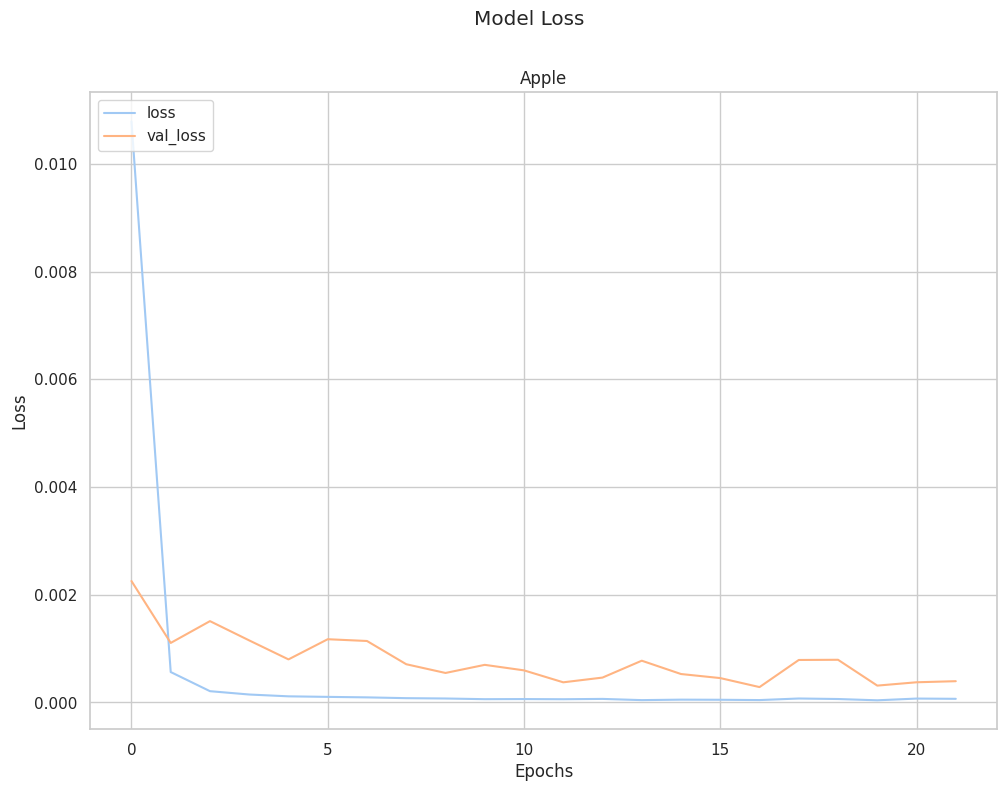

In [38]:
fig, axes = plt.subplots()
plt.suptitle('Model Loss')
axes.plot(history.epoch, history.history['loss'], label = 'loss')
axes.plot(history.epoch, history.history['val_loss'], label = 'val_loss')
axes.set_title(stock_name)
axes.set_xlabel('Epochs')
axes.set_ylabel('Loss')
axes.xaxis.set_tick_params()
axes.yaxis.set_tick_params()
axes.legend(loc = 'upper left')

In [39]:
y_pred_denormalized = denormalize_predictions(y_pred, df)
y_test_denormalized = denormalize_predictions(y_test, df)
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_denormalized - y_test_denormalized) ** 2))

    # Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

    # Print all metrics
print(f'The RMSE for Apple is {rmse}')
print(f'The MAE for Apple is {mae}')
print(f'The R-squared (R²) for Apple is {r2}')

The RMSE for Apple is 5.483585257353822
The MAE for Apple is 0.019367179681927763
The R-squared (R²) for Apple is 0.9381078593845845


Validation set size: (456, 23), Predictions size: (456,)


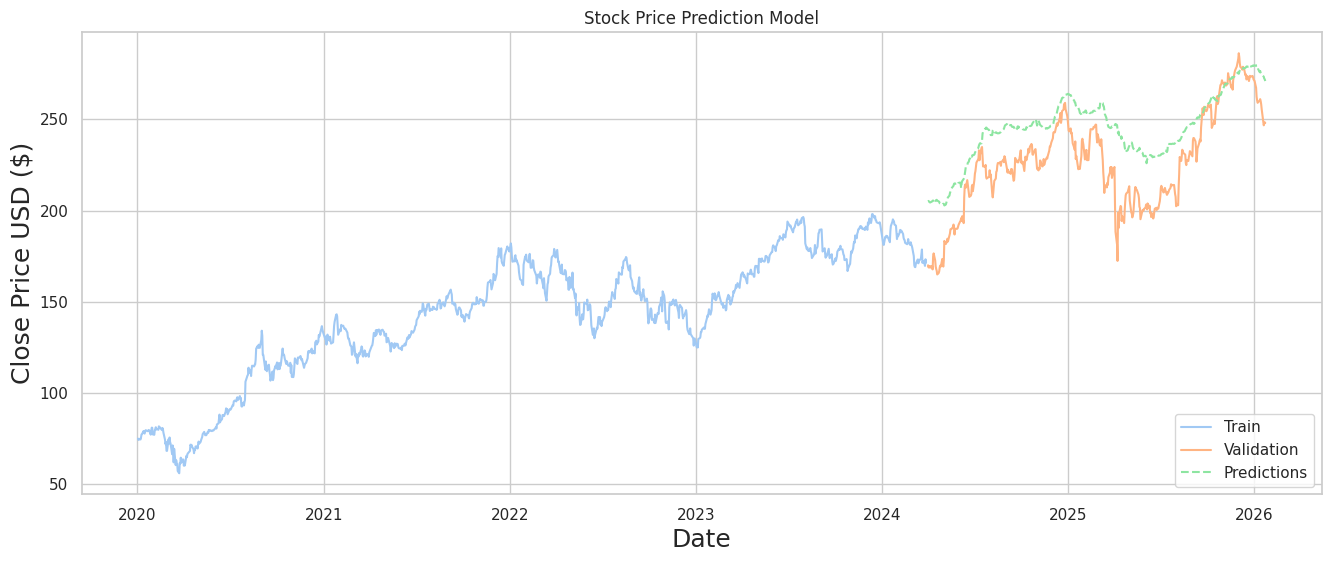

In [40]:
def create_dataframes_for_plots(dataframe, y_pred):
    training_data_len = int(np.ceil(len(dataframe) * 0.70))

    # Split the data
    plot_train = dataframe.iloc[:training_data_len].copy()
    plot_test = dataframe.iloc[training_data_len:].copy()

    # Align Predictions with the same index
    plot_test.loc[:, 'Predictions'] = y_pred.flatten()  # Ensure predictions are 1D

    return plot_train, plot_test

# Create train and test dataframes
plot_train, plot_test = create_dataframes_for_plots(df, y_pred_denormalized)

# Ensure train and validation sets maintain the original index
training_data_len = int(np.ceil(len(df) * 0.70))
train = df.iloc[:training_data_len].copy()
valid = df.iloc[training_data_len:].copy()

# Correctly align Predictions in `valid`
valid['Predictions'] = plot_test['Predictions']

# 🛠️ Ensure `valid` and `Predictions` align in length
print(f"Validation set size: {valid.shape}, Predictions size: {plot_test['Predictions'].shape}")

# Plot the data
plt.figure(figsize=(16,6))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Fix: Use original index for proper alignment
plt.plot(train.index, train['Close'], label='Train')


plt.plot(valid.index, valid['Close'], label='Validation')

plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='dashed')

# Ensure the x-axis (date) is correctly aligned
plt.legend(loc='lower right')
plt.show()


In [41]:
def forecast_lstm(model, df, normalized_df, future_days=30, n_steps=50):
    """
    Forecast the next `future_days` using a trained LSTM model.

    Args:
        model: Trained LSTM model.
        df (DataFrame): Original DataFrame with stock prices (should have a DateTime index).
        normalized_df (np.array): Normalized dataset used as LSTM input.
        future_days (int): Number of days to predict (default: 30).
        n_steps (int): Number of time steps for LSTM input (default: 50).

    Returns:
        forecast_df (DataFrame): DataFrame with forecasted dates and denormalized prices.
    """

    #print(f"\n========= Forecasting Next {future_days} Days =========")

    # Ensure normalized_df is a NumPy array
    if isinstance(normalized_df, pd.DataFrame):
        normalized_df = normalized_df.values  # Convert to array

    # Determine the number of features dynamically
    n_features = normalized_df.shape[1]  # Detect number of features

    # Validate input shape
    if len(normalized_df.shape) != 2:
        raise ValueError(f"Expected 2D normalized_df, but got shape {normalized_df.shape}")

    # Get test data (last `n_steps` days)
    x_input = normalized_df[-n_steps:].reshape((1, n_steps, n_features))  # Reshape for LSTM input
    temp_input = list(x_input[0])  # Convert to list for iterative predictions

    lstm_predictions = []

    # Ensure df index is datetime format
    #df.index = pd.to_datetime(df['Date'])
    last_date = df.index[-1]

    # Generate forecast dates (business days only)
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='B')

    # **Fit MinMaxScaler on only 'Close' column**
    scaler = MinMaxScaler()
    df_close = df[['Close']]  # Select the 'Close' price column
    df_scaled = scaler.fit_transform(df_close)  # Fit and transform only the Close price

    # Generate predictions iteratively
    for _ in range(future_days):
        x_input = np.array(temp_input[-n_steps:]).reshape((1, n_steps, n_features))  # Ensure correct input shape

        predicted_price = model.predict(x_input, verbose=0).flatten()[0]  # Predict next step (normalized)

        # Append predicted price to results
        lstm_predictions.append(predicted_price)

        # Append predicted value as a new feature row
        new_input = np.zeros(n_features)  # Zero array with detected number of features
        new_input[0] = predicted_price  # Store predicted Close price

        temp_input.append(new_input.tolist())  # Append new row
        temp_input = temp_input[1:]  # Keep only last `n_steps`

    # Convert lstm_predictions to NumPy array
    lstm_predictions = np.array(lstm_predictions).reshape(-1, 1)  # Reshape for inverse transformation

    # **Denormalize the predicted values**
    denormalized_predictions = scaler.inverse_transform(lstm_predictions).flatten()

    # Create DataFrame with predicted dates & prices
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted Price': denormalized_predictions})
    forecast_df.set_index('Date', inplace=True)

    #print("\nFinal Forecasted Prices:")
    #print(forecast_df)

    return forecast_df


In [42]:
forecast_df=forecast_lstm(model, df, new_df, future_days=60, n_steps=110)

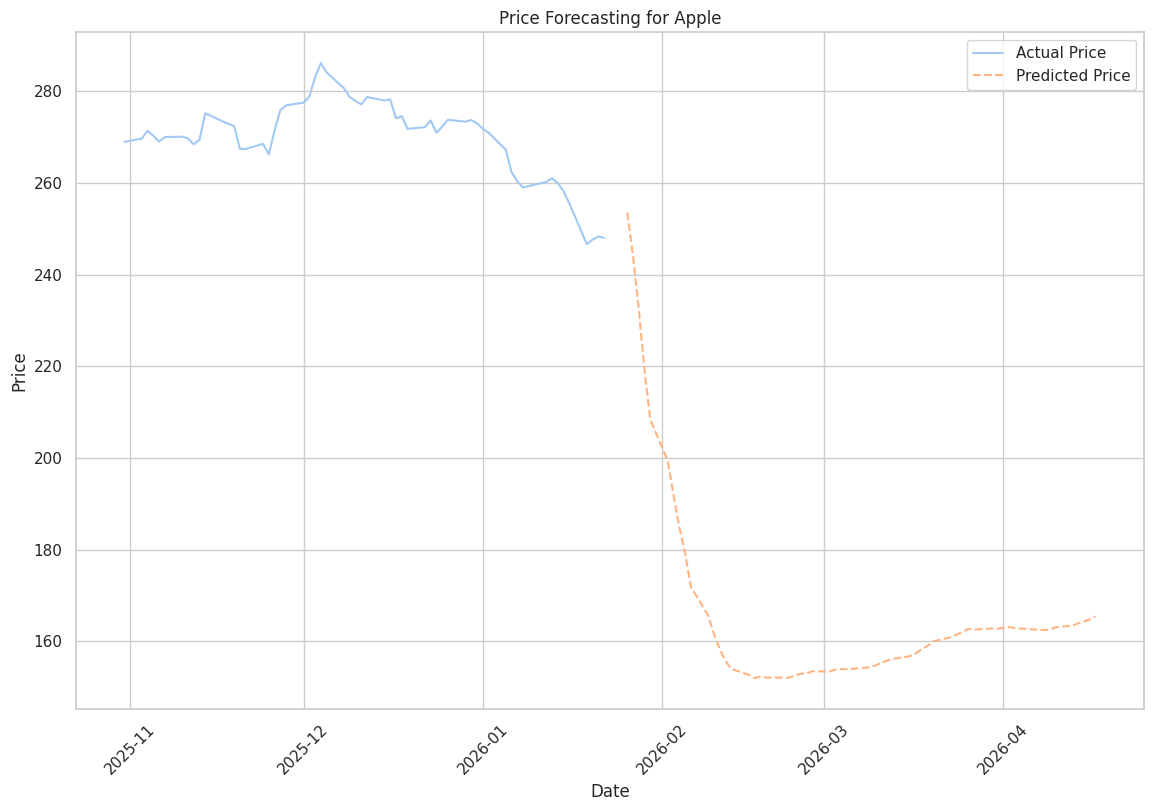

In [43]:
last_date = df.index[-1]  # This will be the last date in your actual data

# Generate the actual dates for the previous 50 business days
dates_actual = pd.date_range(end=last_date - pd.Timedelta(days=1), periods=60, freq='B')

# Generate forecast dates for the next 30 business days after the last available date
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='B')


# Plot the actual data (y_test)
plt.plot(dates_actual,df['Close'][-60:].values, label='Actual Price')

# Plot the predicted data (lstm_op)
plt.plot(forecast_dates, forecast_df, label='Predicted Price', linestyle='--')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Price Forecasting for Apple')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [44]:
def analyze_trend(forecast_df):
    """
    Analyze forecasted stock prices to determine short-term or long-term trend.
    """
    # Compute Simple Moving Averages (SMA)
    forecast_df['7-Day SMA'] = forecast_df['Predicted Price'].rolling(window=7, min_periods=1).mean()
    forecast_df['30-Day SMA'] = forecast_df['Predicted Price'].rolling(window=30, min_periods=1).mean()

    # Get the last predicted price and first predicted price
    first_price = forecast_df['Predicted Price'].iloc[0]
    last_price = forecast_df['Predicted Price'].iloc[-1]

    # Determine trend based on price movement
    if last_price > first_price:
        investment_trend = "📈 Uptrend (Good for Investing)"
    else:
        investment_trend = "📉 Downtrend (Risky Investment)"

    print("Investment Trend:", investment_trend)

    return forecast_df


Investment Trend: 📉 Downtrend (Risky Investment)


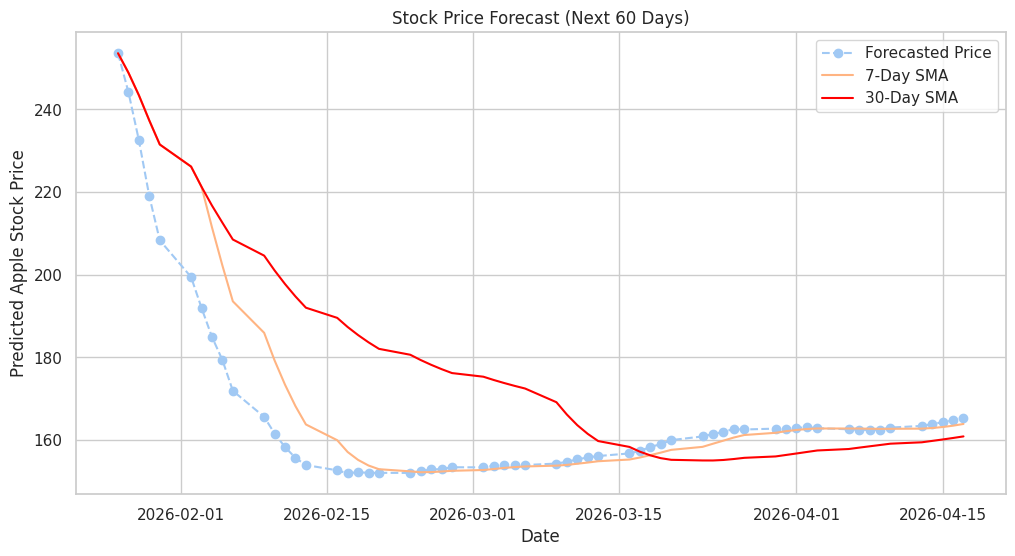

In [45]:
def plot_forecast(forecast_df):
    """
    Plot forecasted stock prices with trend indicators.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_df.index, forecast_df['Predicted Price'], label="Forecasted Price", marker='o', linestyle='dashed')
    plt.plot(forecast_df.index, forecast_df['7-Day SMA'], label="7-Day SMA", linestyle='solid')
    plt.plot(forecast_df.index, forecast_df['30-Day SMA'], label="30-Day SMA", linestyle='solid', color='red')

    plt.xlabel("Date")
    plt.ylabel(f"Predicted {stock_name} Stock Price")
    plt.title("Stock Price Forecast (Next 60 Days)")
    plt.legend()
    plt.show()

# Example usage
forecast_results = forecast_lstm(model, df, new_df, 60,110)  # Forecast the next 60 days
forecast_results = analyze_trend(forecast_results)  # Analyze trend and add SMAs
plot_forecast(forecast_results)  # Plot the forecasted results


In [46]:
df=df.reset_index()

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


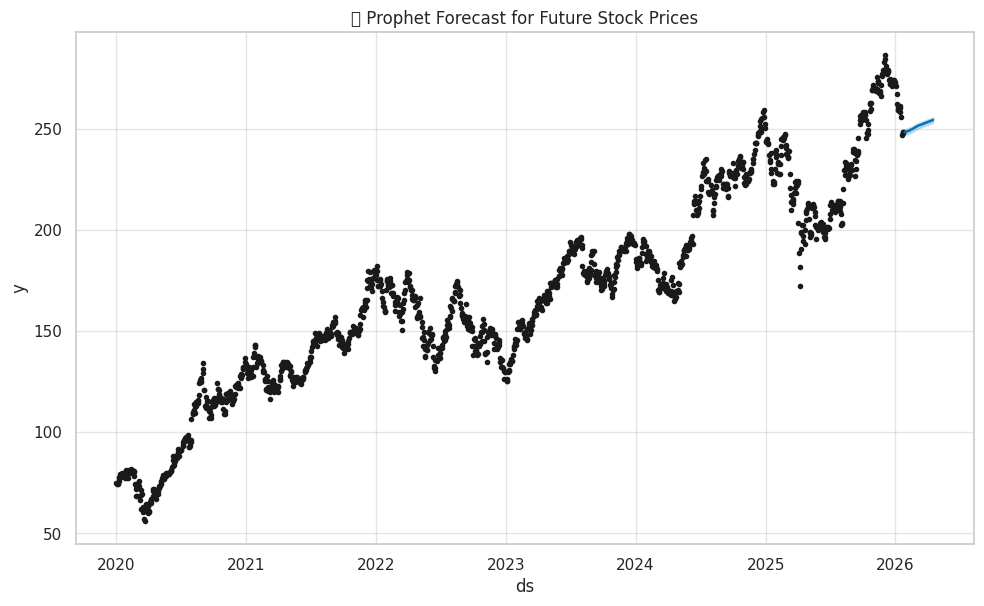

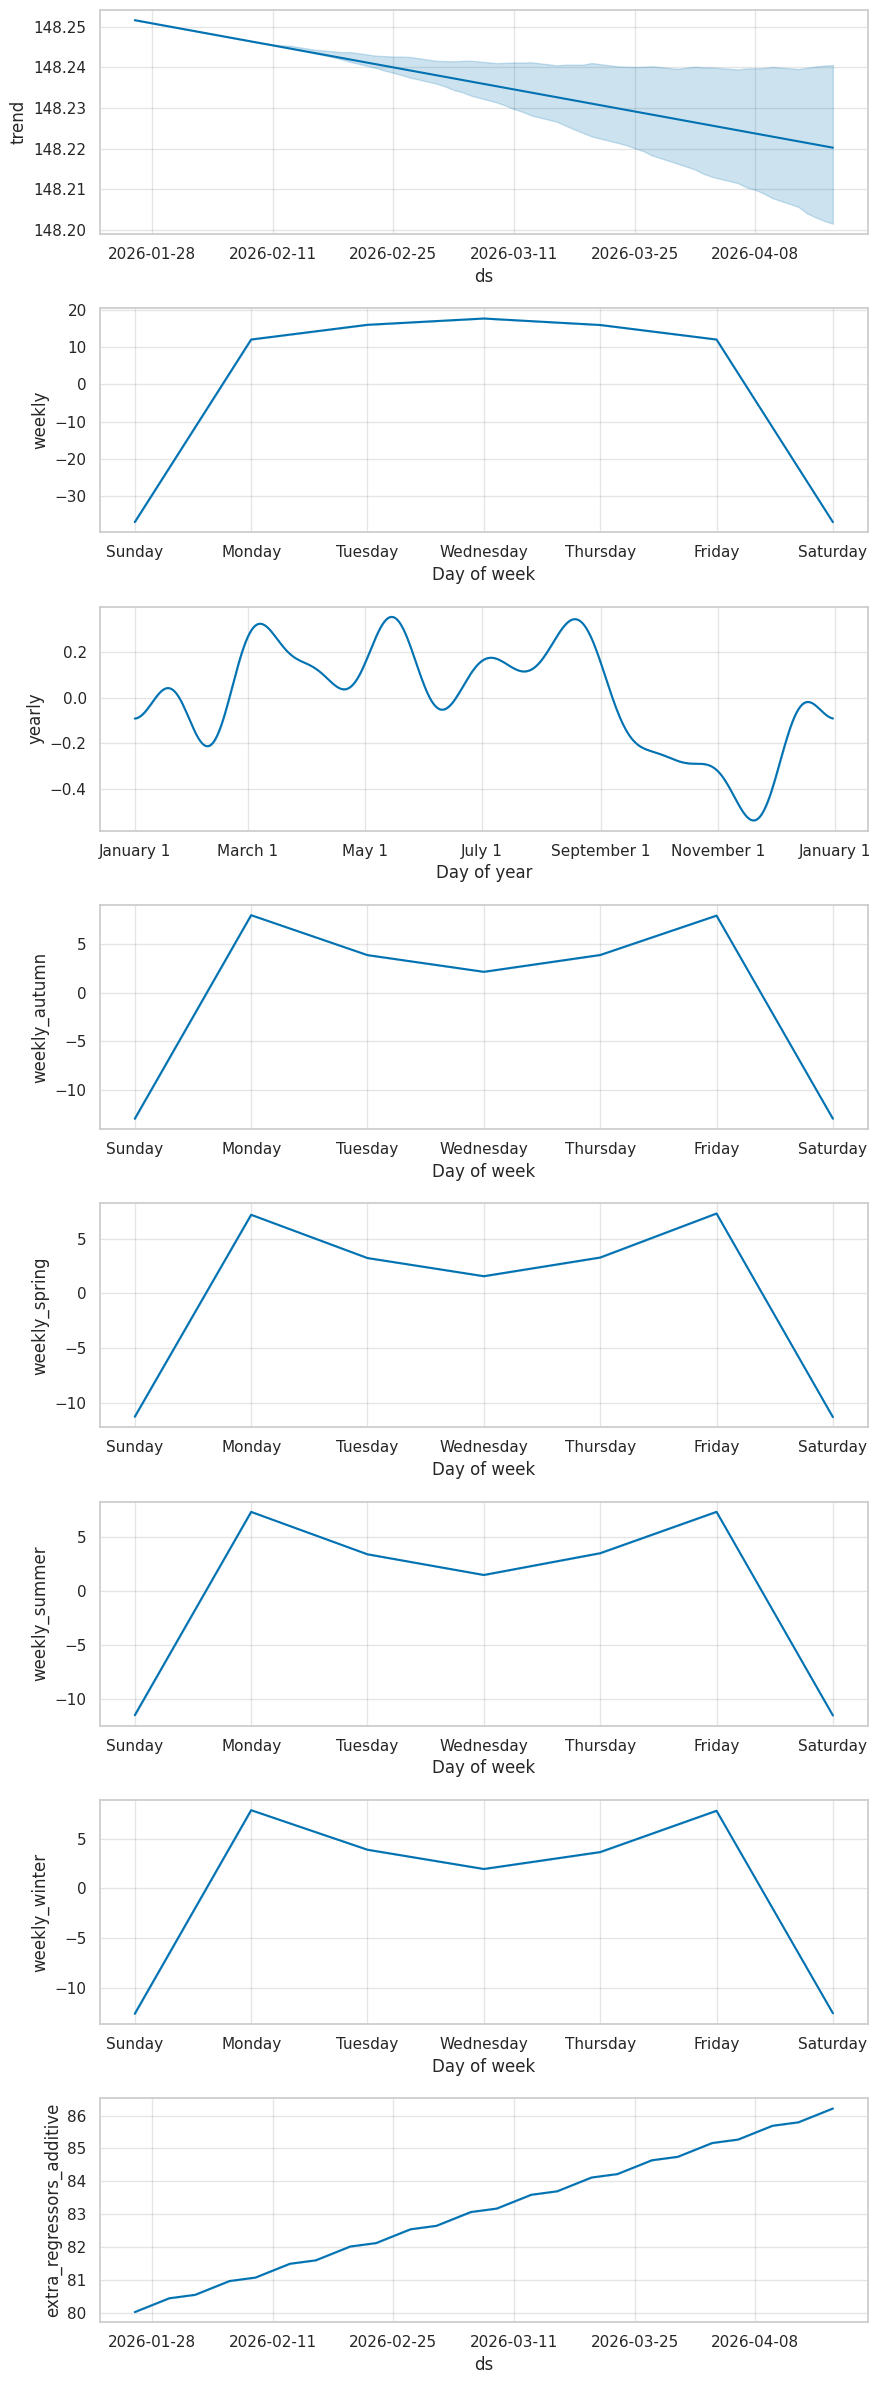


📊 Future Predictions:
           ds        yhat  yhat_lower  yhat_upper
0  2026-01-26  248.183818  246.910913  249.506634
1  2026-01-27  248.223106  246.876359  249.531586
2  2026-01-28  248.054413  246.706912  249.405793
3  2026-01-29  248.108397  246.786036  249.425406
4  2026-01-30  248.463177  247.073304  249.783831
5  2026-02-02  248.575962  247.219039  249.903306
6  2026-02-03  248.616913  247.234916  249.982284
7  2026-02-04  248.453038  247.083971  249.804583
8  2026-02-05  248.514971  247.194111  249.835457
9  2026-02-06  248.880736  247.518559  250.334553
10 2026-02-09  249.042658  247.797580  250.516829
11 2026-02-10  249.104385  247.776806  250.558871
12 2026-02-11  248.962847  247.576174  250.304562
13 2026-02-12  249.048240  247.665467  250.359612
14 2026-02-13  249.438112  248.122700  250.788594
15 2026-02-16  249.671378  248.303464  251.034714
16 2026-02-17  249.754958  248.379086  251.083534
17 2026-02-18  249.633562  248.270072  250.951381
18 2026-02-19  249.736988  

In [47]:

def prophet_forecasting(df, future_days=60):
    """
    Forecast future stock prices using Facebook Prophet with additional regressors.

    Args:
        df (pd.DataFrame): DataFrame containing historical stock prices and technical indicators.
        future_days (int): Number of future days to predict.

    Returns:
        Prophet model and future predictions DataFrame.
    """

    # Ensure index is datetime
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.fillna(0, inplace=True)  # Fill missing values

    # Define features (regressors) to use in the model
    regressors = ['Open', 'High', 'Low', 'Volume',
       'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper',
       'BB_Lower']

    seasonal_conditions = ['is_spring', 'is_summer', 'is_autumn', 'is_winter']

    # Ensure seasonal condition columns exist, filling missing ones with 0 (False)
    for season in seasonal_conditions:
        if season not in df.columns:
            df[season] = 0  # Default to False if missing

    # Prepare training data for Prophet
    df_prophet = df[['Close'] + regressors + seasonal_conditions].reset_index()
    df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

    # Initialize the Prophet model
    model = Prophet()

    # Add each regressor to the model
    for regressor in regressors:
        model.add_regressor(regressor)

    # Add seasonalities with conditions
    model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
    model.add_seasonality(name='weekly_spring', period=7, fourier_order=5, condition_name='is_spring')
    model.add_seasonality(name='weekly_summer', period=7, fourier_order=5, condition_name='is_summer')
    model.add_seasonality(name='weekly_autumn', period=7, fourier_order=5, condition_name='is_autumn')
    model.add_seasonality(name='weekly_winter', period=7, fourier_order=5, condition_name='is_winter')

    # Fit the model
    model.fit(df_prophet)

    # Create future dataframe with only future dates
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_df = pd.DataFrame({'ds': future_dates})

    # Extrapolate future regressors using Linear Regression
    for regressor in regressors:
        if regressor in df.columns:
            X = np.arange(len(df)).reshape(-1, 1)  # Time index
            y = df[regressor].values  # Regressor values

            model_lr = LinearRegression()
            model_lr.fit(X, y)  # Train on entire dataset

            future_X = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
            future_df[regressor] = model_lr.predict(future_X)  # Predict future values

    # Fill seasonal conditions in future data
    for season in seasonal_conditions:
        future_df[season] = df[season].iloc[-1]  # Assuming last known season continues

    # Predict future values
    forecast = model.predict(future_df)

    # Plot forecasted results
    fig1 = model.plot(forecast)
    plt.title("📈 Prophet Forecast for Future Stock Prices")
    plt.show()

    # Plot components (trend, seasonality effects)
    fig2 = model.plot_components(forecast)
    plt.show()

    return model, forecast, future_df

# Run function
model, forecast, future_df = prophet_forecasting(df, future_days=60)

# Print Future Predictions
print("\n📊 Future Predictions:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [48]:
y_true = df['Close'][-60:]  # Actual values
y_pred = forecast['yhat']  # Predicted values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 19.39
RMSE: 20.97


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15797.559, Time=2.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16832.543, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16383.662, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15799.578, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16830.550, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15798.557, Time=3.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15801.009, Time=1.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15799.334, Time=3.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15802.247, Time=3.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15800.547, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15797.458, Time=3.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15800.569, Time=1.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=15799.022, Time=2.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15800.472, Time=0.89 sec
 ARIMA(0,1,4)(0,0,0

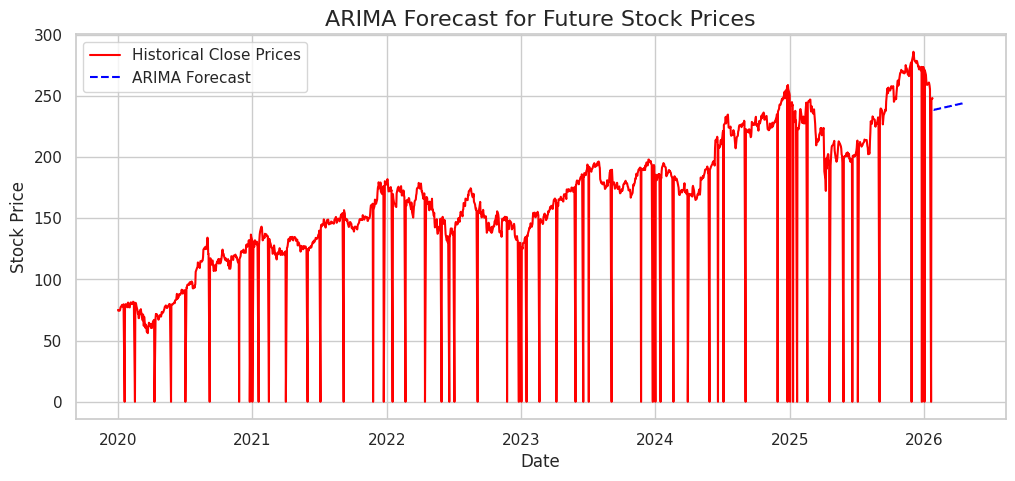


📊 Future Predictions:
            Forecast_Close
2026-01-26      238.706807
2026-01-27      238.607055
2026-01-28      238.809733
2026-01-29      238.867333
2026-01-30      238.976292
2026-02-02      239.067070
2026-02-03      239.164283
2026-02-04      239.259219
2026-02-05      239.354961
2026-02-06      239.450417
2026-02-09      239.545974
2026-02-10      239.641496
2026-02-11      239.737030
2026-02-12      239.832560
2026-02-13      239.928091
2026-02-16      240.023622
2026-02-17      240.119153
2026-02-18      240.214684
2026-02-19      240.310215
2026-02-20      240.405746
2026-02-23      240.501277
2026-02-24      240.596808
2026-02-25      240.692339
2026-02-26      240.787870
2026-02-27      240.883401
2026-03-02      240.978932
2026-03-03      241.074463
2026-03-04      241.169994
2026-03-05      241.265525
2026-03-06      241.361056
2026-03-09      241.456587
2026-03-10      241.552118
2026-03-11      241.647649
2026-03-12      241.743180
2026-03-13      241.838711
2026-

In [49]:
def arima_forecasting(df, future_days=60):
    """
    Forecast future stock prices using ARIMA with additional regressors.

    Args:
        df (pd.DataFrame): DataFrame containing historical stock prices and technical indicators.
        future_days (int): Number of future days to predict.

    Returns:
        ARIMA model and future predictions DataFrame.
    """

    # Ensure index is datetime and has frequency info
    df = df.copy()
    df=df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.asfreq('B')  # Ensure the frequency is business days
    df.fillna(0, inplace=True)  # Fill missing values

    # Define features (regressors) to use in ARIMAX
    regressors = ['Open', 'High', 'Low', 'Volume',
                  'moving_average_10', 'RSI', 'MACD', 'MACD_Signal',
                  '20_SMA', 'BB_Upper', 'BB_Lower']

    # Ensure regressors exist in the dataset
    for regressor in regressors:
        if regressor not in df.columns:
            df[regressor] = 0  # Default to 0 if missing

    # Select target variable
    y = df['Close']

    # Find best ARIMA parameters
    arima_model = auto_arima(y, exogenous=df[regressors], seasonal=False,
                             stepwise=True, trace=True, suppress_warnings=True)

    # Fit final ARIMA model
    model = sm.tsa.ARIMA(y, order=arima_model.order, exog=df[regressors]).fit()

    # Create future dataframe for predictions
    future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_days, freq='B')
    future_df = pd.DataFrame(index=future_dates)

    # Extrapolate regressors using Linear Regression
    for regressor in regressors:
        X = np.arange(len(df)).reshape(-1, 1)  # Time index
        y_reg = df[regressor].values  # Regressor values

        model_lr = LinearRegression()
        model_lr.fit(X, y_reg)

        future_X = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
        future_df[regressor] = model_lr.predict(future_X)  # Predict future values

    # Predict future stock prices
    forecast = model.forecast(steps=future_days, exog=future_df[regressors])

    # Store results
    future_df['Forecast_Close'] = forecast

        # Set the seaborn style to 'pastel'
    sns.set(style="whitegrid", palette="pastel")

    # Plot results
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df['Close'], label='Historical Close Prices', color='red')
    plt.plot(future_df.index, future_df['Forecast_Close'], label='ARIMA Forecast', color='blue', linestyle='dashed')

    # Add title and labels
    plt.title("ARIMA Forecast for Future Stock Prices", fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    # Calculate MAE and RMSE for the historical predictions
    historical_predictions = model.predict(start=0, end=len(df)-1, exog=df[regressors])

    mae = mean_absolute_error(df['Close'], historical_predictions)
    rmse = np.sqrt(mean_squared_error(df['Close'], historical_predictions))

    return model, future_df, mae, rmse

# Run function
model, future_df, mae, rmse = arima_forecasting(df, future_days=60)

# Print Future Predictions
print("\n📊 Future Predictions:")
print(future_df[['Forecast_Close']])
print('Performance Metrics')
print(f"\n📊 MAE: {mae}")
print(f"📊 RMSE: {rmse}")


In [50]:
def objective(trial, X, y):
    """ Optuna objective function for hyperparameter tuning."""
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 0, 10),
        'lambda': trial.suggest_float('lambda', 0, 10),
        'random_state': 42
    }

    tscv = TimeSeriesSplit(n_splits=5)
    errors = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        errors.append(mean_absolute_error(y_test, y_pred))

    return np.mean(errors)

def xgboost_hyperparameters(df, future_days=60):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.asfreq('B')
    df.fillna(0, inplace=True)

    features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10', 'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']
    for reg in features:
        if reg not in df.columns:
            df[reg] = 0

    X = df[features]
    y = df['Close']

    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X, y), n_trials=30)
    best_params = study.best_params
    print("\n🎯 Best Parameters:", best_params)
    return best_params

best_params = xgboost_hyperparameters(df, future_days=60)

[I 2026-01-26 13:50:13,262] A new study created in memory with name: no-name-649e5f9b-b78b-44a9-acda-4cfff8d40a2d
[I 2026-01-26 13:50:14,863] Trial 0 finished with value: 8.871902200156121 and parameters: {'n_estimators': 320, 'max_depth': 4, 'learning_rate': 0.05776238557891796, 'subsample': 0.9022095030595011, 'colsample_bytree': 0.8809806303799832, 'alpha': 3.416374418184226, 'lambda': 0.881208716825691}. Best is trial 0 with value: 8.871902200156121.
[I 2026-01-26 13:50:21,333] Trial 1 finished with value: 9.07852618004861 and parameters: {'n_estimators': 461, 'max_depth': 12, 'learning_rate': 0.2964806679503377, 'subsample': 0.7059687201772895, 'colsample_bytree': 0.7964152092621992, 'alpha': 1.2952257340517948, 'lambda': 0.31803689543635993}. Best is trial 0 with value: 8.871902200156121.
[I 2026-01-26 13:50:23,052] Trial 2 finished with value: 9.970145662607688 and parameters: {'n_estimators': 201, 'max_depth': 8, 'learning_rate': 0.2517181109535381, 'subsample': 0.6303412899566


🎯 Best Parameters: {'n_estimators': 340, 'max_depth': 3, 'learning_rate': 0.11856531883677657, 'subsample': 0.746273036134735, 'colsample_bytree': 0.8321397046234416, 'alpha': 1.077831177553226, 'lambda': 0.7744077073753464}


In [51]:
features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10', 'RSI', 'MACD',
            'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']

for reg in features:
    if reg not in df.columns:
        df[reg] = 0  # Fill missing features with 0
df=df.set_index('Date')
X = df[features]
y = df['Close']


# Time Series Split for Cross Validation
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses = [], []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = xgb.XGBRegressor(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    maes.append(mean_absolute_error(y_test, y_pred))
    rmses.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print model performance
print(f"Mean MAE: {np.mean(maes)}")
print(f"Mean RMSE: {np.mean(rmses)}")


Mean MAE: 8.745227991639391
Mean RMSE: 12.487994124400275


In [52]:
def extrapolate_lstm(df, feature, future_days, look_back=100):
    # Normalize data
    scaler = MinMaxScaler()
    scaled_feature = scaler.fit_transform(df[[feature]])

    # Prepare dataset
    X_train, y_train = [], []
    for i in range(look_back, len(scaled_feature)):
        X_train.append(scaled_feature[i-look_back:i, 0])
        y_train.append(scaled_feature[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict future values
    future_values = []
    last_data = scaled_feature[-look_back:].reshape(1, look_back, 1)

    for _ in range(future_days):
        pred = model.predict(last_data)[0][0]
        future_values.append(pred)
        last_data = np.concatenate((last_data[:, 1:, :], np.array(pred).reshape(1, 1, 1)), axis=1)


    return scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()


# Define the features you want to extrapolate
features = ['Open', 'High', 'Low', 'Volume', 'moving_average_10',
            'RSI', 'MACD', 'MACD_Signal', '20_SMA', 'BB_Upper', 'BB_Lower']

future_days = 60  # How many days into the future to predict

# Create a DataFrame to store extrapolated values
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='B')
future_df = pd.DataFrame(index=future_dates)

# Loop through all features and apply LSTM extrapolation
for feature in features:
    future_df[feature] = extrapolate_lstm(df, feature, future_days)

print(future_df.head())  # Check the extrapolated values


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━

In [53]:
future_df['Predicted_Close'] = model.predict(future_df[features])

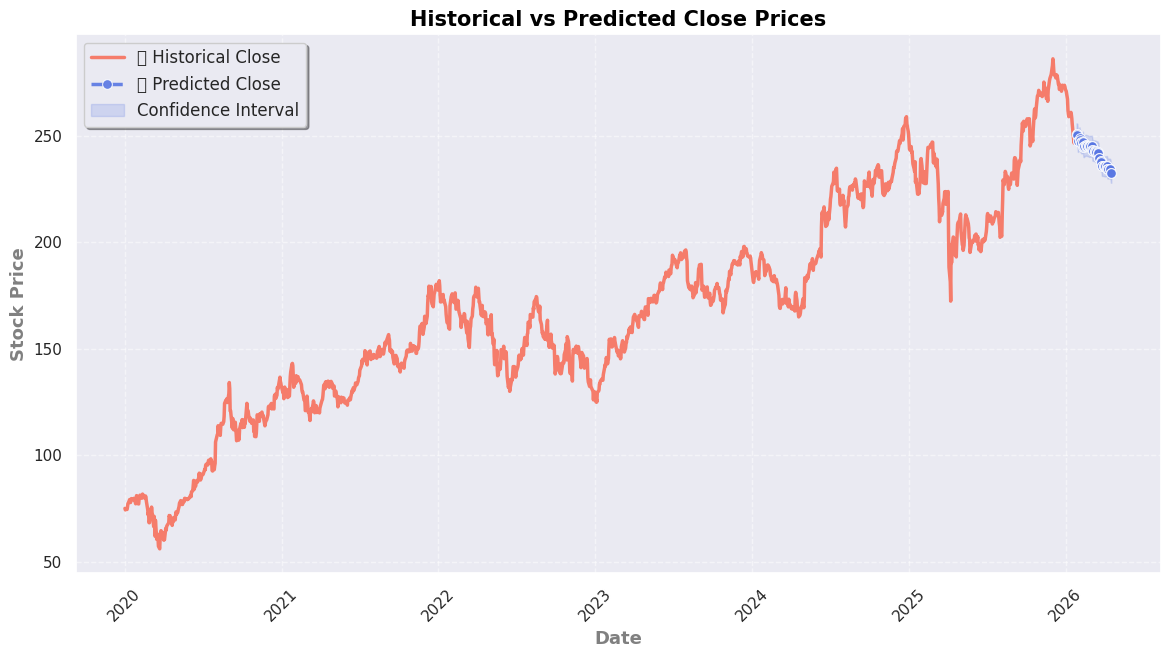

🎯 **Future Predictions:** 
            Predicted_Close
2026-01-26       250.864807
2026-01-27       250.850327
2026-01-28       250.648819
2026-01-29       247.452576
2026-01-30       247.453796
2026-02-02       249.087250
2026-02-03       247.625793
2026-02-04       247.888580
2026-02-05       246.968582
2026-02-06       246.734116
2026-02-09       246.750732
2026-02-10       247.110214
2026-02-11       244.983963
2026-02-12       244.895416
2026-02-13       245.104813
2026-02-16       245.684265
2026-02-17       245.616241
2026-02-18       245.448502
2026-02-19       245.491135
2026-02-20       245.452408
2026-02-23       245.175018
2026-02-24       245.026581
2026-02-25       245.026581
2026-02-26       245.061234
2026-02-27       245.141693
2026-03-02       245.052231
2026-03-03       245.235886
2026-03-04       243.221024
2026-03-05       243.245804
2026-03-06       243.065277
2026-03-09       243.080643
2026-03-10       242.582626
2026-03-11       242.809402
2026-03-12       242.

In [54]:
# Set seaborn style
sns.set_style("darkgrid")

# Create figure and axis
plt.figure(figsize=(14, 7))

# Use a color palette
historical_color = sns.color_palette("magma", as_cmap=True)(0.7)  # Deep purple
predicted_color = sns.color_palette("coolwarm", as_cmap=True)(0.1)  # Bright blue

# Plot historical Close prices with gradient
sns.lineplot(x=df.index, y=df['Close'], label='📉 Historical Close', color=historical_color, linewidth=2.5, alpha=0.9)

# Plot predicted future prices with a glowing effect
sns.lineplot(x=future_df.index, y=future_df['Predicted_Close'], label='📈 Predicted Close', linestyle='dashed',
             color=predicted_color, marker='o', markersize=7, linewidth=2.5, alpha=0.9)

# Add a confidence interval using a shaded area (Optional: If available)
plt.fill_between(future_df.index, future_df['Predicted_Close'] * 0.98, future_df['Predicted_Close'] * 1.02,
                 color=predicted_color, alpha=0.2, label='Confidence Interval')

# Formatting the plot
plt.xlabel('Date', fontsize=13, fontweight='bold', color='gray')
plt.ylabel('Stock Price', fontsize=13, fontweight='bold', color='gray')
plt.title('Historical vs Predicted Close Prices', fontsize=15, fontweight='bold', color='black')

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12, loc='upper left', fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Print Future Predictions
print('🎯 **Future Predictions:** ')
print(future_df[['Predicted_Close']])


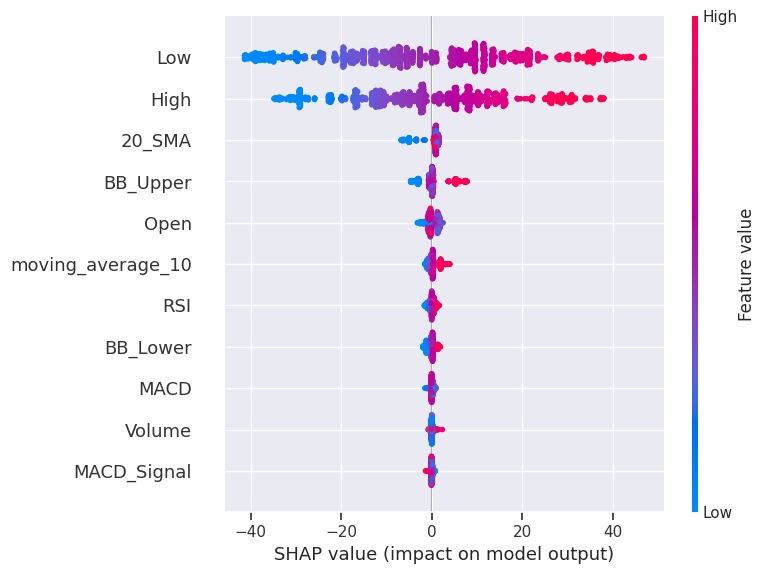

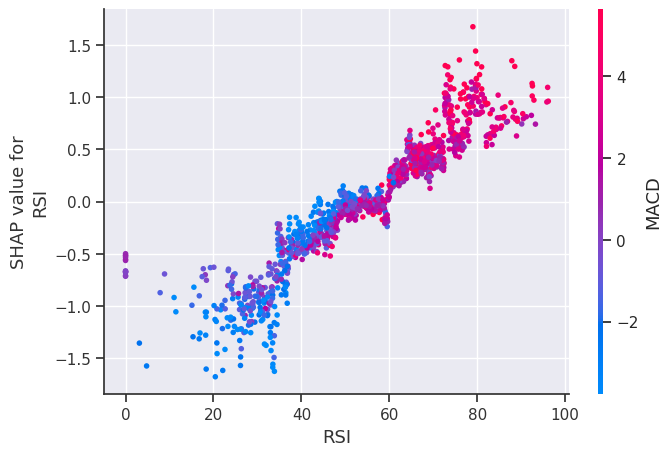

In [55]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model, X_train)
shap_values = explainer(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

# SHAP Dependence Plot
shap.dependence_plot("RSI", shap_values.values, X_train)